# Costa Rica criminality report: Unveiling Patterns and Trends in Reported Crimes from 2020 to Q2 2023

### Introduction
Costa Rica, a lively Central American country, known for its natural beauty and rich cultural heritage, is facing a challenge in maintaining public health. As a data analyst, this project serves as an opportunity to research the trends and patterns in criminal conduct, shedding light on different aspects of crime in the country. By exploring the information provided by the "Organismo de Investigación Judicial" (OIJ).

It is important to notice that this project is not an official record and should not be taken as a complete guide to the actual day-to-day situation of the country. Nevertheless, by leveraging the available information, I aim to discover patterns and trends in reported offences, contributing to a deeper knowledge of the crime environment during the interval from 2020 to the second quarter of 2023.

### Data
The data used for this project was obtained from the official OIJ [website](https://sitiooij.poder-judicial.go.cr/index.php/apertura/transparencia/estadisticas-policiales), which serves as a valuable resource for accessing information on reported crimes in the country. The "Organismo de Investigación Judicial" plays a crucial role in documenting and investigating criminal incidents, and their official reports provide an strong foundation for this analysis. The data includes many useful aspects of reported crimes, such as the types of offenses, geographical distribution, and demographic profiles of victims and offenders. By examining this data, we can gain insights into the nature and extent of criminal activities during a specified timeframe.

### Methodology

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install googletrans==4.0.0-rc1

from googletrans import Translator
from google.colab import drive

drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=0176f8329a8502608f22ad133849964c313c744d8596f08647b84b5afb6f56d0
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling ch

In [ ]:
#all df used for the project
crcri_2020 = pd.read_csv('/content/drive/MyDrive/analytics/crcri/2020/crcri_2020.csv')
crcri_2021 = pd.read_csv('/content/drive/MyDrive/analytics/crcri/2021/crcri_2021.csv')
crcri_2022 = pd.read_csv('/content/drive/MyDrive/analytics/crcri/2022/crcri_2022.csv')

In [ ]:
crcri_2020.rename(columns={'genre': 'gender'}, inplace=True)
crcri_2021.rename(columns={'genre': 'gender'}, inplace=True)
crcri_2022.rename(columns={'genre': 'gender'}, inplace=True)

In [145]:
translation_dict_crime = {
    'HURTO': 'THEFT',
    'ASALTO': 'ASSAULT',
    'ROBO': 'ROBBERY',
    'ROBBERY DE VEHICULO': 'VEHICLE THEFT',
    'TACHA DE VEHICULO': 'VEHICLE SCRATCHING',
    'ROBO DE VEHICULO': 'VEHICLE THEFT',
    'HOMICIDIO': 'HOMICIDE'
}

crcri_2020['crime'] = crcri_2020['crime'].replace(translation_dict_crime, regex=True)
crcri_2021['crime'] = crcri_2021['crime'].replace(translation_dict_crime, regex=True)
crcri_2022['crime'] = crcri_2022['crime'].replace(translation_dict_crime, regex=True)

In [ ]:
translation_dict_sub_crime = {
    'POR DESCUIDO': 'CARELESSNESS',
    'FORZADURA': 'FORCIBLE ENTRY',
    'ARMA DE FUEGO': 'FIREARM',
    'TACHA DE VEHICULO': 'VEHICLE TAMPERING',
    'POR CONFIANZA': 'TRUSTED RELATIONSHIP',
    'ARMA BLANCA': 'BLADED WEAPON',
    'DESCUIDO': 'NEGLECT',
    'CARTERISTA': 'PICKPOCKETING',
    'OTRO O INDETERMINADO': 'OTHER OR UNDETERMINED',
    'BOQUETE': 'SAFE CRACKING',
    'ARREBATO': 'SNATCHING',
    'ESCALAMIENTO': 'BREAK-IN',
    'ARDID PREVIO/DISTRACCION': 'PREVIOUS TRICKERY/DISTRACTION',
    'GOLPES': 'BLOWS',
    'COCHERAZO': 'CAR RAMMING',
    'RUPTURA VENTANA': 'WINDOW BREAKING',
    'ASALTO': 'ASSAULT',
    'CORTA CANDADOS': 'CUTTING PADLOCKS',
    'QUITAN CELOSIAS': 'REMOVE LATTICE',
    'INTIMIDACION VERBAL': 'VERBAL INTIMIDATION',
    'CON LLAVE': 'WITH A KEY',
    'AJUSTE DE CUENTAS/VENGANZA': 'SETTLEMENT OF ACCOUNTS/REVENGE',
    'PROGRESIVOS': 'PROGRESSIVE TECHNIQUE',
    'INMOVILIZACION': 'IMMOBILIZATION',
    'RETIRO DE CAJERO AUTOMATICO': 'ATM WITHDRAWAL',
    'CANDADO CHINO': 'CHINESE LOCK',
    'ARMA CONTUNDENTE': 'BLUNT WEAPON',
    'DISCUSION/REYERTA': 'DISCUSSION/QUARREL',
    'ARDID PREVIO': 'PREVIOUS TRICK',
    'USO DE SOMNIFERO': 'USE OF SEDATIVE',
    'POR LA COMISION DE OTRO DELITO': 'FOR THE COMMISSION OF ANOTHER CRIME',
    'DESCONOCIDO': 'UNKNOWN',
    'GANZUA/VARILLA': 'LOCK PICK/ROD',
    'NO DETERMINADO': 'UNDETERMINED',
    'REPELIENDO ACTIVIDAD CRIMINAL': 'REPELLING CRIMINAL ACTIVITY',
    'VIOLENCIA DOMESTICA': 'DOMESTIC VIOLENCE',
    'FEMICIDIO': 'FEMICIDE',
    'PROFESIONAL': 'PROFESSIONAL',
    'USO DE GAS': 'USE OF GAS',
    'IDEOLOGICO': 'IDEOLOGICAL'
}

crcri_2020['sub_crime'] = crcri_2020['sub_crime'].replace(translation_dict_sub_crime, regex=True)
crcri_2021['sub_crime'] = crcri_2021['sub_crime'].replace(translation_dict_sub_crime, regex=True)
crcri_2022['sub_crime'] = crcri_2022['sub_crime'].replace(translation_dict_sub_crime, regex=True)

In [ ]:
translation_dict_gender = {
    'HOMBRE' : 'Male',
    'MUJER' : 'Female'
}

crcri_2020['gender'] = crcri_2020['gender'].replace(translation_dict_gender, regex=True)
crcri_2021['gender'] = crcri_2021['gender'].replace(translation_dict_gender, regex=True)
crcri_2022['gender'] = crcri_2022['gender'].replace(translation_dict_gender, regex=True)

In [ ]:
def hour_range(df):
    df['hour_range'] = df['hour_range1'] + " - " + df['hour_range2']
    return df

# Call the function for each DataFrame
crcri_2020 = hour_range(crcri_2020)
crcri_2021 = hour_range(crcri_2021)
crcri_2022 = hour_range(crcri_2022)

Brief summary of the crimes occurred  from 2020, 2021 and 2022.

In [146]:
crcri_2021['crime'].value_counts()

THEFT                 13648
ASSAULT               11008
ROBBERY               10805
VEHICLE THEFT          3429
VEHICLE SCRATCHING     3182
HOMICIDE                590
Name: crime, dtype: int64

In [147]:
crcri_2022['crime'].value_counts()

THEFT                 16785
ASSAULT               12824
ROBBERY               11702
VEHICLE THEFT          4550
VEHICLE SCRATCHING     3912
HOMICIDE                662
Name: crime, dtype: int64

In [ ]:
#add month column
crcri_2020['date'] = pd.to_datetime(crcri_2020['date'])
crcri_2020['month'] = crcri_2020['date'].dt.strftime('%B')

crcri_2021['date'] = pd.to_datetime(crcri_2021['date'])
crcri_2021['month'] = crcri_2021['date'].dt.strftime('%B')

crcri_2022['date'] = pd.to_datetime(crcri_2022['date'])
crcri_2022['month'] = crcri_2022['date'].dt.strftime('%B')

In [ ]:
combined_df = pd.concat([crcri_2020, crcri_2021, crcri_2022], axis=0, ignore_index=True)
pivot_table = combined_df.pivot_table(index='month', columns=combined_df['date'].dt.year, aggfunc='size', fill_value=0)
pivot_table

date,2020,2021,2022
month,,,
April,2357,3382,4115
August,3226,3578,4337
December,3256,3879,4413
February,4668,3359,3588
January,4765,3407,3774
July,2650,3600,4526
June,2769,3392,4161
March,3809,3778,4227
May,2968,3256,4121


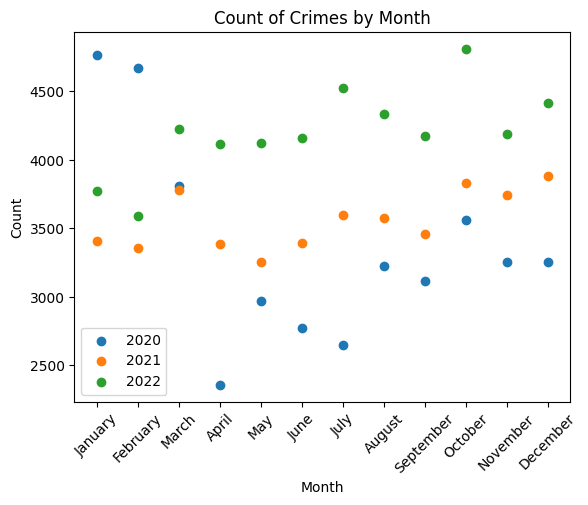

In [149]:
count_crimes_2020 = crcri_2020['month'].value_counts().sort_index()
count_crimes_2021 = crcri_2021['month'].value_counts().sort_index()
count_crimes_2022 = crcri_2022['month'].value_counts().sort_index()

plt.scatter(count_crimes_2020.index, count_crimes_2020.values, label='2020')
plt.scatter(count_crimes_2021.index, count_crimes_2021.values, label='2021')
plt.scatter(count_crimes_2022.index, count_crimes_2022.values, label='2022')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Crimes by Month')

plt.xticks(rotation=45)

plt.legend()

plt.show()

The following graphic of crime data from 2020 to 2022 shows a notable increase in the number of reported crimes in Costa Rica. This upward trend signifies a concerning pattern and prompts a closer examination of the factors contributing to this rise.

Socio-economic issues, like unemployment, poverty, and economic uncertainty are well known to influence criminal behavior. The economic challenges brought about by the COVID-19 pandemic, which began in 2020, may have contributed to increased financial strain and desperation among certain segments of the population, potentially leading to a rise in crimes such as theft, homicide, and property-felony offenses.

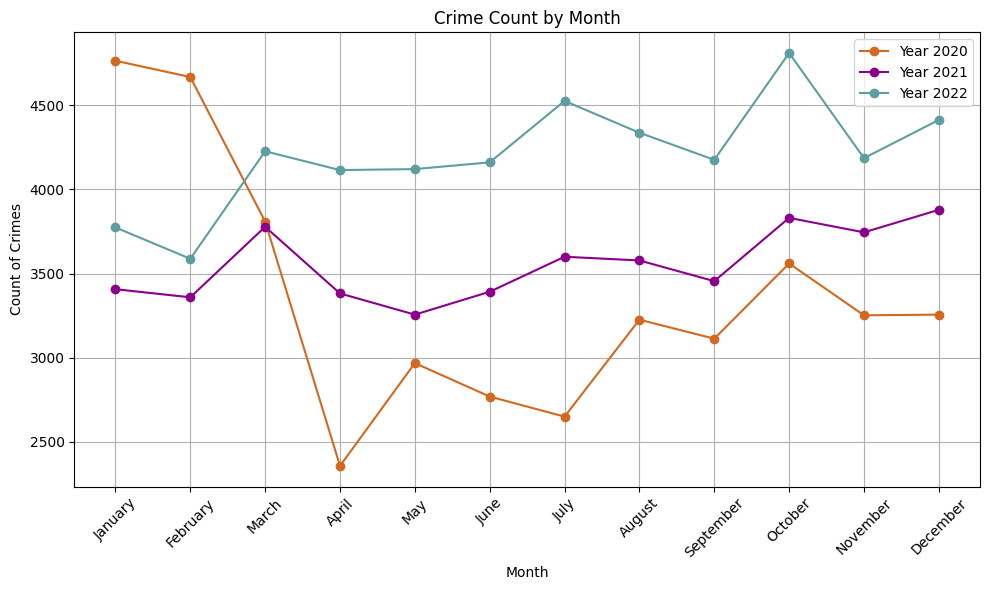

In [150]:
combined_df = pd.concat([crcri_2020, crcri_2021, crcri_2022], ignore_index=True)

crime_count_by_month = combined_df.groupby('month')['crime'].count().reset_index()

month_order = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

crime_count_by_month['month_order'] = crime_count_by_month['month'].map(month_order)
crime_count_by_month = crime_count_by_month.sort_values('month_order')

plt.figure(figsize=(10, 6))

plt.plot(crime_count_by_month['month'], crcri_2020.groupby('month')['crime'].count().reindex(crime_count_by_month['month']).fillna(0), marker='o', color='#D2691E', label='Year 2020')

plt.plot(crime_count_by_month['month'], crcri_2021.groupby('month')['crime'].count().reindex(crime_count_by_month['month']).fillna(0), marker='o', color='#8B008B', label='Year 2021')


plt.plot(crime_count_by_month['month'], crcri_2022.groupby('month')['crime'].count().reindex(crime_count_by_month['month']).fillna(0), marker='o', color='#5F9EA0', label='Year 2022')

plt.xlabel('Month')
plt.ylabel('Count of Crimes')
plt.title('Crime Count by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
crcri_inec = pd.read_csv('/content/drive/MyDrive/analytics/crcri/inec/inec_statistics.csv')
crcri_inec.loc[72, 'year'] = 2022

### Costa Rica population

The "Instituto Nacional de Estadística y Censos" (INEC). Is an autonomous institution of the Government of Costa Rica, responsible for the production and dissemination of official statistics in the country.

The following data, was diligently collected from the "Instituto Nacional de Estadística y Censos" (INEC), showcasing the population statistics for the years 2020 to 2022 in Costa Rica.

[Source](https://inec.cr/es/tematicas/listado?topics=91%252C646)


In [ ]:
crcri_inec

#cleaning data

,year,population,nativity,birth rate
0,1950,868934,37 248,42.9
1,1951,897630,39 239,43.7
2,1952,929173,42 461,45.7
3,1953,962485,42 817,44.5
4,1954,997535,48 157,48.3
...,...,...,...,...
68,2018,5003402,68 449,13.7
69,2019,5058007,64 274,12.7
70,2020,5111238,58 156,11.4
71,2021,5163038,54 288,10.5


### Crime Rate / per 100,000 people

Crime rate refers to a statistical measure used to quantify the level of criminal activity within a specific population or geographic area during a particular period, usually expressed as a ratio or a rate per a specific unit of the population.

### Formula:
Crime Rate = (Total Number of Reported Crimes / Total Population) x 100,000

In [151]:
p_2020 = crcri_inec.loc[70, 'year']
p_2021 = crcri_inec.loc[71, 'year']
p_2022 = crcri_inec.loc[72, 'year']

population_df = pd.DataFrame([p_2020], [p_2021], [p_2022])


tc20 = crcri_2020.shape[0]
tc21 = crcri_2021.shape[0]
tc22 = crcri_2022.shape[0]

tcs = pd.Series([tc20, tc21, tc22], index=[p_2020, p_2021, p_2022], name='total_crimes')


crd = crcri_inec.merge(tcs, left_on='year', right_index=True)

crd['crime_rate_per_100k'] = (crd['total_crimes'] / crd['population'])* 100000
crd['crime_rate_per_100k'] = crd['crime_rate_per_100k'].round(2)
crd

,year,population,nativity,birth rate,decade,total_crimes,crime_rate_per_100k
70,2020,5111238,58 156,11.4,2020,40393,790.28
71,2021,5163038,54 288,10.5,2020,42662,826.30
72,2022,5213374,53 435,10.2,2020,50435,967.42


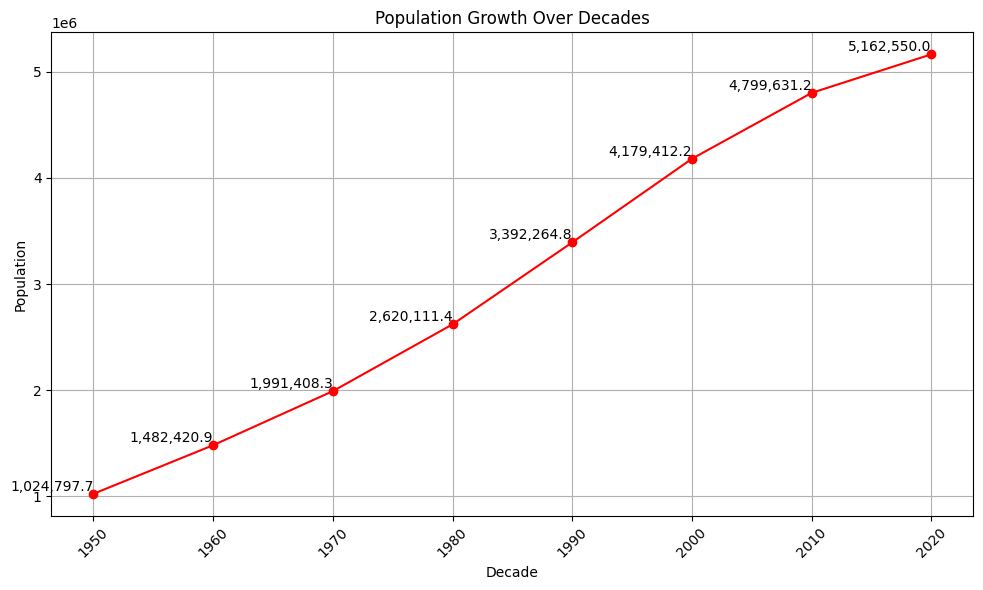

In [153]:
crcri_inec['decade'] = (crcri_inec['year'] // 10) * 10

population_by_decade = crcri_inec.groupby('decade')['population'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(population_by_decade['decade'],
         population_by_decade['population'],
         marker='o',
         linestyle='-',
         color='r')

plt.xlabel('Decade')
plt.ylabel('Population')
plt.title('Population Growth Over Decades')
plt.grid(True)
plt.xticks(population_by_decade['decade'], rotation=45)

for i, pop in enumerate(population_by_decade['population']):
    plt.text(population_by_decade['decade'][i], pop, f"{pop:,}", ha='right', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

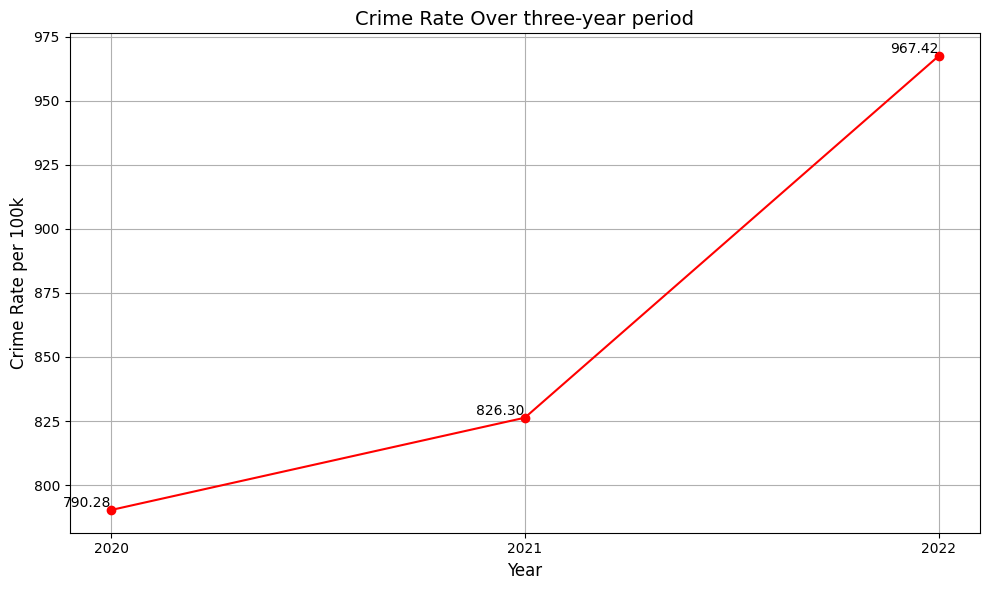

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(crd['year'], crd['crime_rate_per_100k'],
         marker='o',
         linestyle='-',
         color='r')

plt.title('Crime Rate Over three-year period',
          fontsize=14)

plt.xlabel('Year',
           fontsize=12)

plt.ylabel('Crime Rate per 100k',
           fontsize=12)

years = crd['year'].apply(int).unique()
plt.xticks(years)

for x, y in zip(crd['year'], crd['crime_rate_per_100k']):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()

We can observe a notable increase in the crime rate over the three-year period from 2020 to 2022. The crime rate per 100,000 people has shown a consistent upward trend, rising from 790.28 in 2020 to 967.42 in 2022.

##Homicide rate

Homicide, tragically, has been an enduring and concerning issue in the country. Costa Rica is facing the unsettling reality of elevated homicide rates over the years.

The data obtained from the OIJ represents a comprehensive and inclusive collection of all reported homicides, regardless of the type or circumstances. As the official law enforcement agency in Costa Rica responsible for investigating criminal cases, the OIJ diligently records and documents every instance of homicide that comes to its attention.

The prevalence of homicides in Costa Rica is a concern for law enforcement agencies, policymakers, and citizens in general. While Costa Rica is known for its relatively low crime rates compared to some of its neighboring countries, the persistent levels of violent crime, particularly homicides, have posed significant challenges to public safety and security.

In [ ]:
crcri_2020.head()

,id,crime,sub_crime,date_time,date,hour_range1,hour_range2,victim,sub_victim,victim_affected,age,gender,victim_nationality,city,canton,hour_range,month
0,100001,ASSAULT,BLADED WEAPON,NaN,2020-01-05,18:00:00,20:59:59,PERSONA,PEATON,PERSONA,Mayor de edad,Female,COSTA RICA,SAN JOSE,SAN JOSE,18:00:00 - 20:59:59,January
1,100002,ASSAULT,BLADED WEAPON,NaN,2020-01-05,12:00:00,14:59:59,PERSONA,PEATON,PERSONA,Menor de edad,Male,COSTA RICA,HEREDIA,SANTA BARBARA,12:00:00 - 14:59:59,January
2,100003,ASSAULT,BLADED WEAPON,NaN,2020-01-05,18:00:00,20:59:59,PERSONA,PEATON,PERSONA,Mayor de edad,Female,COSTA RICA,ALAJUELA,SAN CARLOS,18:00:00 - 20:59:59,January
3,100004,ASSAULT,BLADED WEAPON,NaN,2020-01-06,9:00:00,11:59:59,PERSONA,PEATON,PERSONA,Mayor de edad,Male,NICARAGUA,SAN JOSE,SAN JOSE,9:00:00 - 11:59:59,January
4,100005,ASSAULT,BLADED WEAPON,NaN,2020-01-05,12:00:00,14:59:59,PERSONA,PEATON,PERSONA,Mayor de edad,Female,COSTA RICA,SAN JOSE,SAN JOSE,12:00:00 - 14:59:59,January


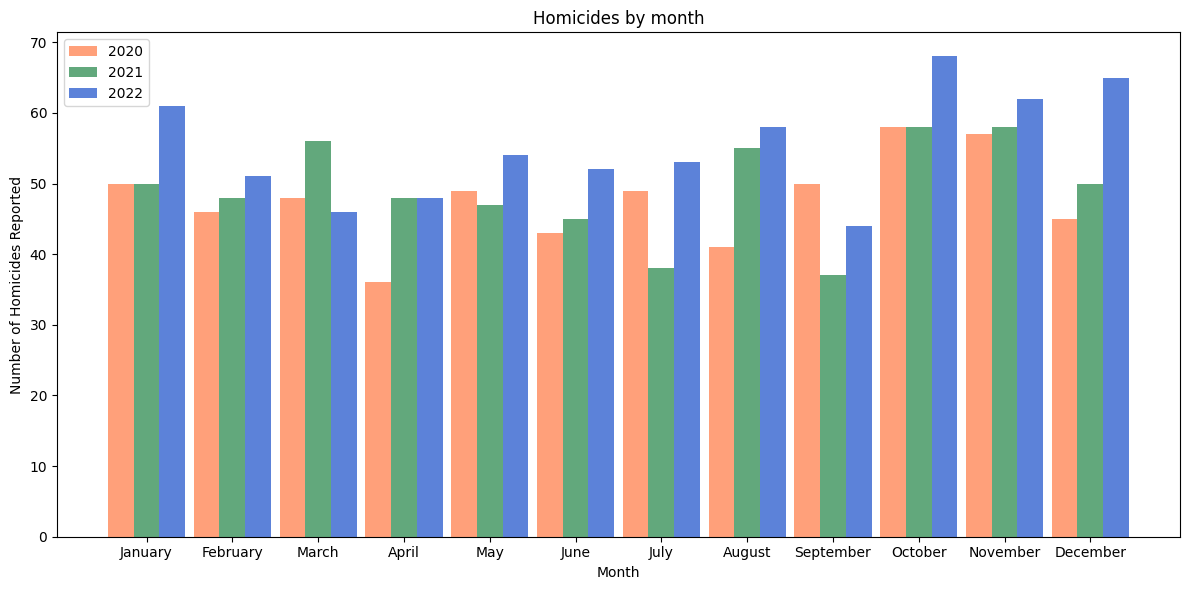

In [ ]:
combined_df = pd.concat([crcri_2020, crcri_2021, crcri_2022])

crcri_2020.loc[0, 'crime'] = 'HOMICIDE'
crcri_2021.loc[1, 'crime'] = 'HOMICIDE'
crcri_2022.loc[2, 'crime'] = 'HOMICIDE'

merged_df_homic = pd.concat([crcri_2020, crcri_2021, crcri_2022])

merged_df_homic['date'] = pd.to_datetime(merged_df_homic['date'])

merged_df_homic2 = merged_df_homic[merged_df_homic['crime'] == 'HOMICIDE']

plt.figure(figsize=(12, 6))

num_years = 3
bar_width = 0.3
months = merged_df_homic2['month'].unique()
colors = ['#FFA07A', '#62A87C', '#5C82D9']



#generated with chatgpt
for i, (year, color) in enumerate(zip([2020, 2021, 2022],colors)):
    year_df = merged_df_homic2[merged_df_homic2['date'].dt.year == year]
    homicides_by_month = year_df['month'].value_counts().reindex(months, fill_value=0)
    x = [j + i * bar_width for j in range(len(months))]
    plt.bar(x, homicides_by_month, width=bar_width, color=color, label=str(year))

plt.xlabel('Month')
plt.ylabel('Number of Homicides Reported')
plt.title('Homicides by month')
plt.xticks([r + bar_width for r in range(len(months))], months)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#generated with chatgpt

all_dfs = [crcri_2020, crcri_2021, crcri_2022]
crimes_combined = pd.concat(all_dfs)

homicide_combined_df = crimes_combined[crimes_combined['crime'] == 'HOMICIDE']

city_homicide_counts = homicide_combined_df.groupby('city')['crime'].count().reset_index()

city_homicide_counts.rename(columns={'crime': 'HOMICIDE_COUNT'}, inplace=True)

pivot_table = pd.pivot_table(homicide_combined_df,
                             index='city',
                             columns=homicide_combined_df['date'].dt.year,
                             values='crime',
                             aggfunc='count',
                             fill_value=0)

pivot_table.columns = ['HOMICIDE COUNT ' + str(year) for year in pivot_table.columns]
yearly_totals = pivot_table.sum()

pivot_table.loc['YEARLY TOTAL'] = yearly_totals

hom_20 = crcri_2020['crime'].value_counts()['HOMICIDE']
hom_21 = crcri_2021['crime'].value_counts()['HOMICIDE']
hom_22 = crcri_2022['crime'].value_counts()['HOMICIDE']

pop_2020 = crcri_inec.loc[70, 'population']
pop_2020_int = int(pop_2020)


pop_2021 = crcri_inec.loc[71, 'population']
pop_2021_int = int(pop_2021)

pop_2022 = crcri_inec.loc[72, 'population']
pop_2022_int = int(pop_2022)


homicide_rate_per_100k_2020 = (hom_20 / pop_2020_int) * 100000
homicide_rate_per_100k_2021 = (hom_21 / pop_2021_int) * 100000
homicide_rate_per_100k_2022 = (hom_22 / pop_2022_int) * 100000

# Add 'HOMICIDE_RATE_PER_100k' row to the pivot table
pivot_table.loc['HOMICIDE RATE PER 100k'] = [homicide_rate_per_100k_2020, homicide_rate_per_100k_2021, homicide_rate_per_100k_2022]

rd_hrate_rd = pivot_table.applymap(lambda x: round(x))

rd_hrate_rd

,HOMICIDE COUNT 2020,HOMICIDE COUNT 2021,HOMICIDE COUNT 2022
city,,,
ALAJUELA,77,70,106
CARTAGO,38,41,43
GUANACASTE,33,36,61
HEREDIA,48,55,49
LIMON,128,152,171
PUNTARENAS,85,105,112
SAN JOSE,163,131,120
YEARLY TOTAL,572,590,662
HOMICIDE RATE PER 100k,11,11,13


We can see a concerning trend of increasing homicides and homicide rates conjunctively in Costa Rica over the three-year period.

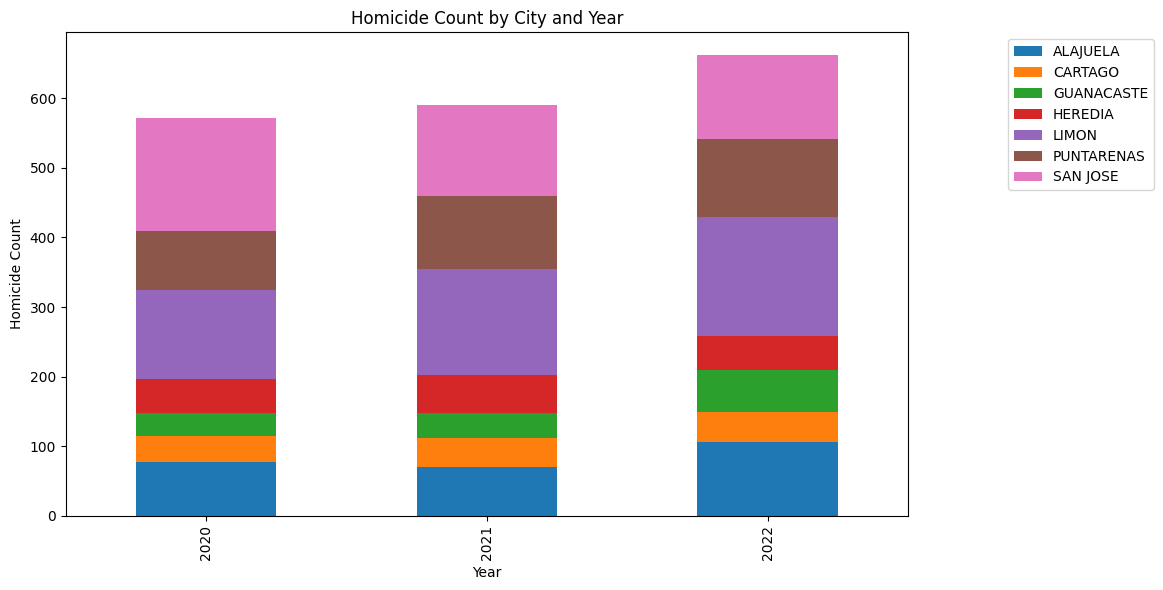

In [ ]:
homicide_combined_df = homicide_combined_df[homicide_combined_df['crime'] == 'HOMICIDE']

homicide_combined_df['date'] = pd.to_datetime(homicide_combined_df['date'])

pivot_table = pd.pivot_table(homicide_combined_df, index='city', columns=homicide_combined_df['date'].dt.year, values='crime', aggfunc='count', fill_value=0)

pivot_table['TOTAL'] = pivot_table.sum(axis=1)

ax = pivot_table.drop('TOTAL', axis=1).T.plot(kind='bar', stacked=True, figsize=(12, 6))

ax.set_title('Homicide Count by City and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Homicide Count')

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

##Provinces with the highest homicides

We can observe distinct regional variations in the number of homicides committed in different provinces of Costa Rica. Specifically, San Jose and Limon having the highest gross of homicides, while Guanacaste and Cartago have reported the least number of crimes of this type.

##San Jose:

The province of San Jose, being the capital and most populous province of Costa Rica, faces higher rates of crime, including homicides. As a major urban center with a dense population, it is susceptible to different socio-economic factors that may contribute to criminal activity. Gang-related issues, and drug trafficking routes can all play a role in elevating the homicide count in this province.

In [157]:
dfs1 = [crcri_2020, crcri_2021, crcri_2022]
combined_df1 = pd.concat(dfs1)

filtered_df_chepe = combined_df1[(combined_df1['city'] == 'SAN JOSE') & (combined_df1['crime'] == 'HOMICIDE')]

homic_sjo = filtered_df_chepe.groupby(['canton', filtered_df_chepe['date'].dt.year])['crime'].count().unstack(fill_value=0)

homic_sjo = homic_sjo.sort_values(by=[2020, 2021, 2022], ascending=False)

homic_sjo

date,2020,2021,2022
canton,,,
SAN JOSE,53,47,51
DESAMPARADOS,25,16,8
GOICOECHEA,19,13,16
TIBAS,13,14,8
VASQUEZ DE CORONADO,9,9,0
ALAJUELITA,9,5,5
PEREZ ZELEDON,7,8,6
CURRIDABAT,7,3,3
MORAVIA,5,3,3


##Limon:
Limon, located in the eastern side of Costa Rica, is historically linked to drug trafficking and organized crime, making this province more susceptible to violent incidents. Since is a strategic location having a major port area, magnifies these issues. Economic disparities, limited opportunities, and social vulnerabilities can may increase crime rates in this region.

In [158]:
dfs2 = [crcri_2020, crcri_2021, crcri_2022]
combined_df2 = pd.concat(dfs2)

filtered_df_limon = combined_df2[(combined_df2['city'] == 'LIMON') & (combined_df2['crime'] == 'HOMICIDE')]

homic_lim = filtered_df_limon.groupby(['canton', filtered_df_limon['date'].dt.year])['crime'].count().unstack(fill_value=0)

homic_lim = homic_lim.sort_values(by=[2020, 2021, 2022], ascending=False)

homic_lim

date,2020,2021,2022
canton,,,
LIMON,51,52,63
POCOCI,25,41,44
MATINA,22,21,25
GUACIMO,14,19,21
SIQUIRRES,11,16,9
TALAMANCA,5,3,9


##Guanacaste:
Guanacaste, well known for its stunning beaches, has generally reported lower homicide rates compared to other provinces. The prevalence of tourism and associated economic opportunities may contribute to a relatively safer environment. Besides, community cohesion and local support systems play a significant role in maintaining lower crime levels in this province.

In [155]:
dfs3 = [crcri_2020, crcri_2021, crcri_2022]
combined_df3 = pd.concat(dfs3)

filtered_df_guana = combined_df3[(combined_df3['city'] == 'GUANACASTE') & (combined_df3['crime'] == 'HOMICIDE')]

homic_gua = filtered_df_guana.groupby(['canton', filtered_df_guana['date'].dt.year])['crime'].count().unstack(fill_value=0)


homic_gua = homic_gua.sort_values(by=[2020, 2021, 2022], ascending=False)

homic_gua

date,2020,2021,2022
canton,,,
CARRILLO,8,2,6
LA CRUZ,7,16,6
LIBERIA,6,4,10
SANTA CRUZ,5,4,15
NICOYA,3,2,9
TILARAN,3,1,3
ABANGARES,1,0,0
BAGACES,0,6,7
CANAS,0,1,5


##Cartago:
Cartago, has historically recorded lower homicide rates. The geographic location, away from major urban centers and drug trafficking routes, may contribute to have a more stable and secure environment. Also, a strong sense of community and effective community policing initiatives may contribute to keeping crime rates in line.

In [154]:
dfs4 = [crcri_2020, crcri_2021, crcri_2022]
combined_df4 = pd.concat(dfs1)

filtered_df_cartago = combined_df4[(combined_df4['city'] == 'CARTAGO') & (combined_df4['crime'] == 'HOMICIDE')]

homic_cart = filtered_df_cartago.groupby(['canton', filtered_df_cartago['date'].dt.year])['crime'].count().unstack(fill_value=0)

homic_cart = homic_cart.sort_values(by=[2020, 2021, 2022], ascending=False)

homic_cart

date,2020,2021,2022
canton,,,
CARTAGO,14,16,15
LA UNION,13,11,14
PARAISO,6,7,3
TURRIALBA,2,3,4
EL GUARCO,2,2,3
OREAMUNO,1,1,3
ALVARADO,0,1,0
JIMENEZ,0,0,1


##Homicide sub types
The data analyzed strongly supports that account adjustment/revenge is a major cause of homicides in Costa Rica. The evidence reveals a consistent pattern of violent confrontations resulting from personal vendettas, disputes, or conflicts between individuals or groups.

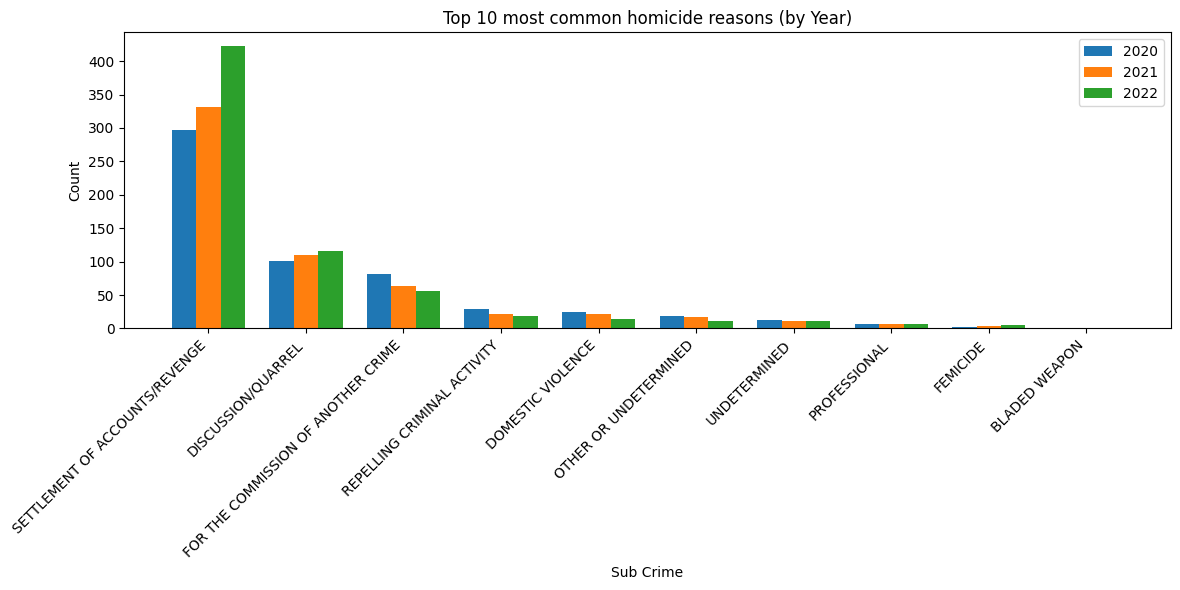

In [159]:
combined_df_subhom = pd.concat([crcri_2020, crcri_2021, crcri_2022], ignore_index=True)

homicide_10subtype_df = combined_df_subhom[combined_df_subhom['crime'] == 'HOMICIDE']

sub_crime_counts_2020 = homicide_10subtype_df[homicide_10subtype_df['date'].dt.year == 2020]['sub_crime'].value_counts()
sub_crime_counts_2021 = homicide_10subtype_df[homicide_10subtype_df['date'].dt.year == 2021]['sub_crime'].value_counts()
sub_crime_counts_2022 = homicide_10subtype_df[homicide_10subtype_df['date'].dt.year == 2022]['sub_crime'].value_counts()


top_sub_crime_counts_2020 = sub_crime_counts_2020.head(10)
top_sub_crime_counts_2021 = sub_crime_counts_2021.head(10)
top_sub_crime_counts_2022 = sub_crime_counts_2022.head(10)

x = top_sub_crime_counts_2020.index
x_pos = range(len(x))
bar_width = 0.25

plt.figure(figsize=(12, 6))

plt.bar(x_pos, top_sub_crime_counts_2020.values, width=bar_width, label='2020')
plt.bar([pos + bar_width for pos in x_pos], top_sub_crime_counts_2021.values, width=bar_width, label='2021')
plt.bar([pos + 2*bar_width for pos in x_pos], top_sub_crime_counts_2022.values, width=bar_width, label='2022')

plt.xlabel('Sub Crime')
plt.ylabel('Count')
plt.title('Top 10 most common homicide reasons (by Year)')
plt.xticks([pos + bar_width for pos in x_pos], x, rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

##Dangerous hour ranges

The following graphs correspond to specific time intervals of a day and are associated with recorded homicide counts for the years 2020, 2021, and 2022 in Costa Rica.

The time range 0:00:00 - 2:59:59 represents the early morning hours, from midnight to 3:00 AM. This period exhibited a higher number of homicides compared to other intervals throughout the day over the three-year span.

<ipython-input-160-37e8d39138b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrhomi_df['year'] = hrhomi_df['date'].dt.year  # Create a new column 'year' to store the year information


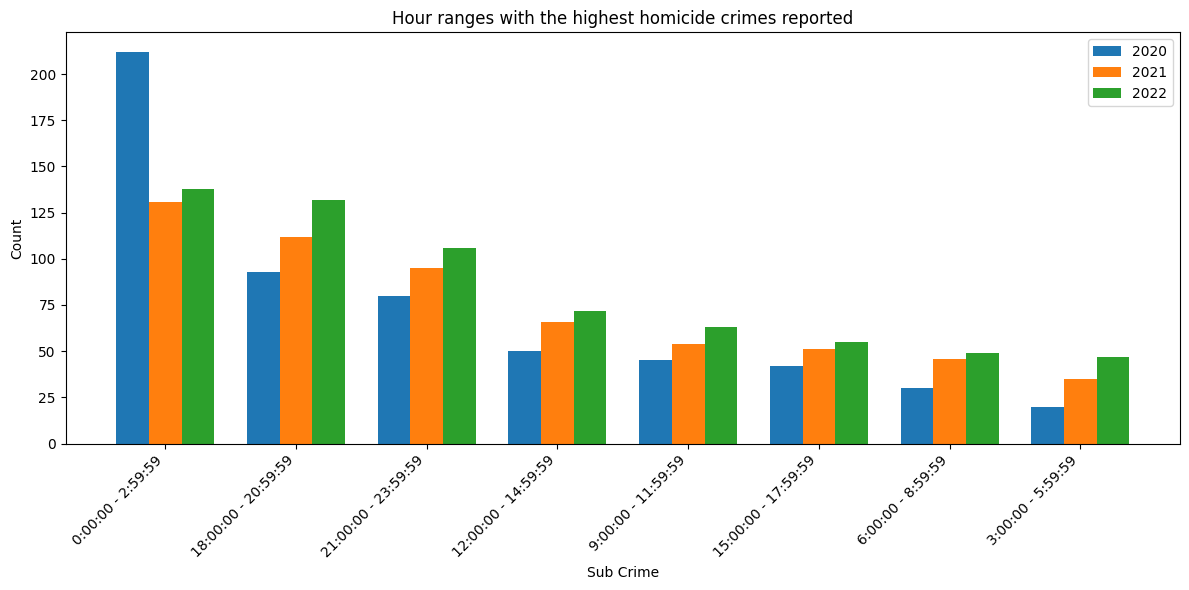

In [160]:
#GENERATED WITH CHATGPT3
# Combine the DataFrames
combined_df_hrhomi = pd.concat([crcri_2020, crcri_2021, crcri_2022], ignore_index=True)

# Filter data for crime category 'HOMICIDE'
hrhomi_df = combined_df_hrhomi[combined_df_hrhomi['crime'] == 'HOMICIDE']

# Count the occurrences of each sub_crime for each year
hrhomi_df['year'] = hrhomi_df['date'].dt.year  # Create a new column 'year' to store the year information

# Calculate the value counts for each year
sub_crime_counts_2020 = hrhomi_df[hrhomi_df['year'] == 2020]['hour_range'].value_counts().head(10)
sub_crime_counts_2021 = hrhomi_df[hrhomi_df['year'] == 2021]['hour_range'].value_counts().head(10)
sub_crime_counts_2022 = hrhomi_df[hrhomi_df['year'] == 2022]['hour_range'].value_counts().head(10)

# Extract x and y data for plotting (Top 10 sub_crimes for each year)
x = sub_crime_counts_2020.index
x_pos = range(len(x))
bar_width = 0.25

# Create the matplotlib graph
plt.figure(figsize=(12, 6))

plt.bar(x_pos, sub_crime_counts_2020.values, width=bar_width, label='2020')
plt.bar([pos + bar_width for pos in x_pos], sub_crime_counts_2021.values, width=bar_width, label='2021')
plt.bar([pos + 2 * bar_width for pos in x_pos], sub_crime_counts_2022.values, width=bar_width, label='2022')

plt.xlabel('Sub Crime')
plt.ylabel('Count')
plt.title('Hour ranges with the highest homicide crimes reported')
plt.xticks([pos + bar_width for pos in x_pos], x, rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
crcri_2020.head()

,id,crime,sub_crime,date_time,date,hour_range1,hour_range2,victim,sub_victim,victim_affected,age,gender,victim_nationality,city,canton,hour_range,month
0,100001,HOMICIDE,BLADED WEAPON,NaN,2020-01-05,18:00:00,20:59:59,PERSONA,PEATON,PERSONA,Mayor de edad,Female,COSTA RICA,SAN JOSE,SAN JOSE,18:00:00 - 20:59:59,January
1,100002,ASSAULT,BLADED WEAPON,NaN,2020-01-05,12:00:00,14:59:59,PERSONA,PEATON,PERSONA,Menor de edad,Male,COSTA RICA,HEREDIA,SANTA BARBARA,12:00:00 - 14:59:59,January
2,100003,ASSAULT,BLADED WEAPON,NaN,2020-01-05,18:00:00,20:59:59,PERSONA,PEATON,PERSONA,Mayor de edad,Female,COSTA RICA,ALAJUELA,SAN CARLOS,18:00:00 - 20:59:59,January
3,100004,ASSAULT,BLADED WEAPON,NaN,2020-01-06,9:00:00,11:59:59,PERSONA,PEATON,PERSONA,Mayor de edad,Male,NICARAGUA,SAN JOSE,SAN JOSE,9:00:00 - 11:59:59,January
4,100005,ASSAULT,BLADED WEAPON,NaN,2020-01-05,12:00:00,14:59:59,PERSONA,PEATON,PERSONA,Mayor de edad,Female,COSTA RICA,SAN JOSE,SAN JOSE,12:00:00 - 14:59:59,January


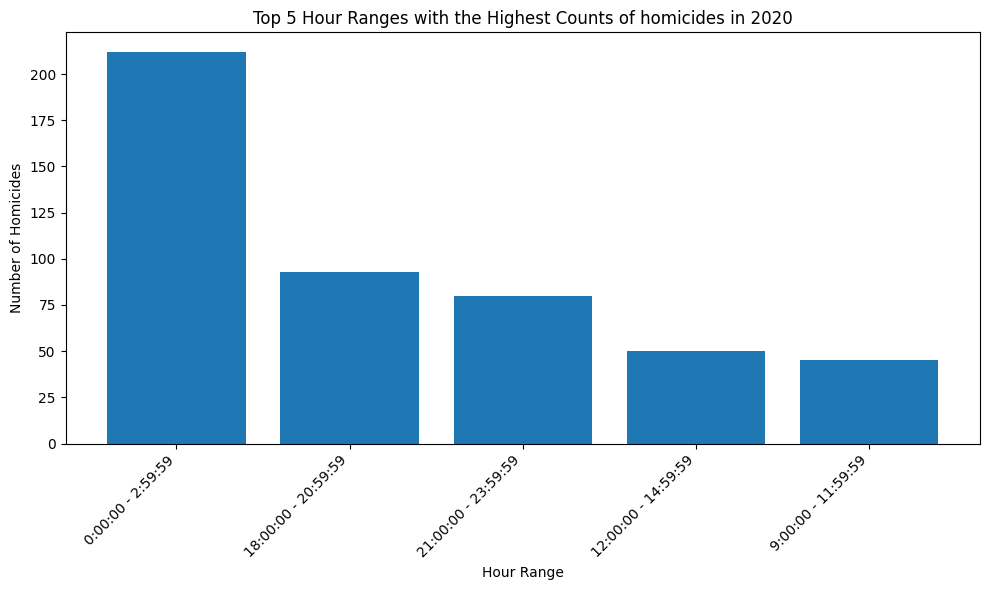

In [ ]:
crcri_2020['hour_range'] = crcri_2020['hour_range1'] + ' - ' + crcri_2020['hour_range2']

hr_count = crcri_2020[crcri_2020['crime'] == 'HOMICIDE'].groupby(['hour_range1','hour_range2'])['crime'].count()
hr_count = hr_count.rename('Number of Murders').sort_values(ascending=False)
hr_count = hr_count.reset_index(name='Number of Murders')
top5_hr_count = hr_count.nlargest(5, 'Number of Murders')

plt.figure(figsize=(10, 6))
plt.bar(top5_hr_count['hour_range1'] + ' - ' + top5_hr_count['hour_range2'], top5_hr_count['Number of Murders'])
plt.xlabel('Hour Range')
plt.ylabel('Number of Homicides')
plt.title('Top 5 Hour Ranges with the Highest Counts of homicides in 2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

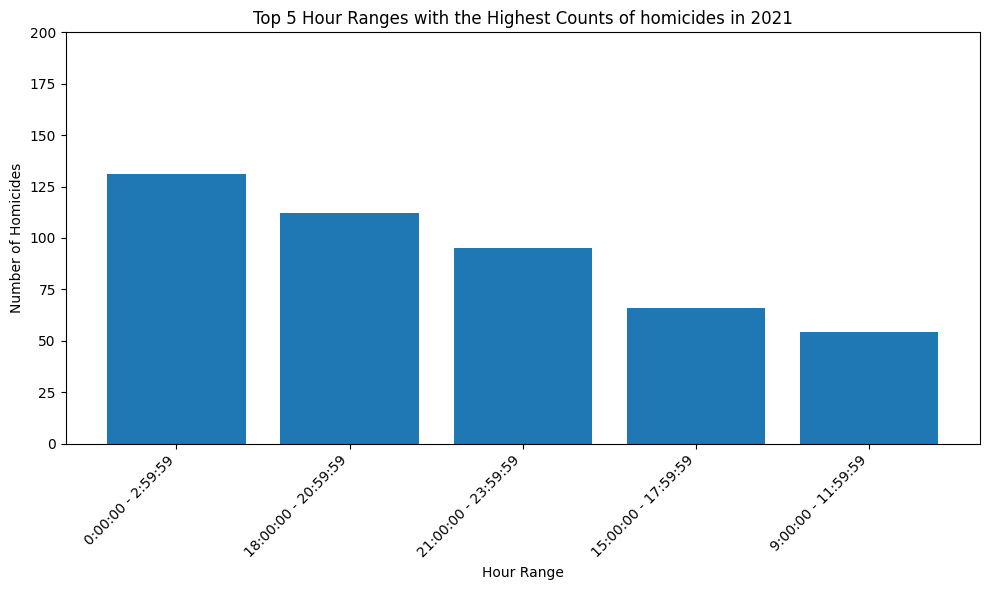

In [ ]:
crcri_2021['hour_range'] = crcri_2021['hour_range1'] + ' - ' + crcri_2021['hour_range2']

hr_count_21 = crcri_2021[crcri_2021['crime'] == 'HOMICIDE'].groupby(['hour_range1','hour_range2'])['crime'].count()
hr_count_21 = hr_count_21.rename('Number of Murders').sort_values(ascending=False)
hr_count_21 = hr_count_21.reset_index(name='Number of Murders')
top5_hr_count = hr_count_21.nlargest(5, 'Number of Murders')

plt.figure(figsize=(10, 6))
plt.bar(top5_hr_count['hour_range1'] + ' - ' + top5_hr_count['hour_range2'], top5_hr_count['Number of Murders'])
plt.xlabel('Hour Range')
plt.ylabel('Number of Homicides')
plt.title('Top 5 Hour Ranges with the Highest Counts of homicides in 2021')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 200)
plt.tight_layout()
plt.show()

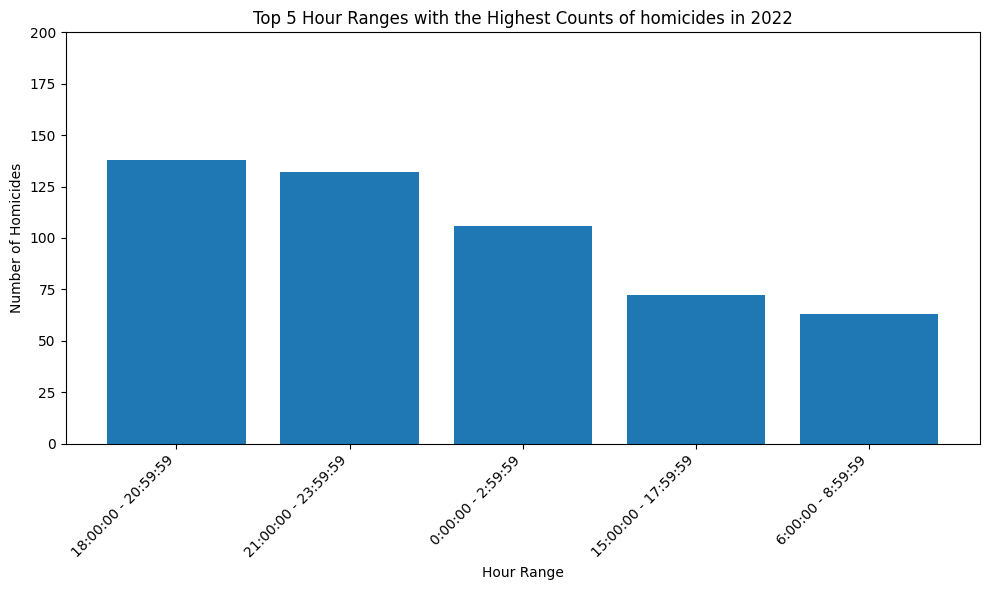

In [ ]:
crcri_2022['hour_range'] = crcri_2022['hour_range1'] + ' - ' + crcri_2022['hour_range2']

hr_count_22 = crcri_2022[crcri_2022['crime'] == 'HOMICIDE'].groupby(['hour_range1','hour_range2'])['crime'].count()
hr_count_22 = hr_count_22.rename('Number of Murders').sort_values(ascending=False)
hr_count_22 = hr_count_22.reset_index(name='Number of Murders')
top5_hr_count = hr_count_22.nlargest(5, 'Number of Murders')

plt.figure(figsize=(10, 6))
plt.bar(top5_hr_count['hour_range1'] + ' - ' + top5_hr_count['hour_range2'], top5_hr_count['Number of Murders'])
plt.xlabel('Hour Range')
plt.ylabel('Number of Homicides')
plt.title('Top 5 Hour Ranges with the Highest Counts of homicides in 2022')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 200)
plt.tight_layout()
plt.show()

In [ ]:
crcri_2020['crime'].value_counts()

THEFT                  11885
ASSAULT                11488
ROBBERY                10030
ROBBERY DE VEHICULO     3212
VEHICLE SCRATCHING      3206
HOMICIDE                 572
Name: crime, dtype: int64

In conclusion, the data analysis reveals that homicides in Costa Rica constitute less than 5 percent of the total crimes committed during the analyzed period. While this statistic highlights the relatively lower prevalence of homicides in comparison to other criminal activities, it is essential to recognize that even a single loss of life is a significant tragedy that impacts families and communities deeply.

The findings indicate that theft and assault emerged as the primary types of crimes committed in Costa Rica. These offenses are more prevalent and contribute significantly to the overall crime rate in the country. The incidence of theft highlights the need for targeted efforts to address socio-economic disparities, enhance security measures, and promote crime prevention strategies.

In addition to the aforementioned points, the data analysis highlights that the provinces of San Jose and Limon have recorded the highest gross of homicides in Costa Rica. These regions experienced a disproportionate share of violent incidents, making them critical areas for targeted intervention and focused law enforcement efforts.

The concentration of homicides in San Jose, the capital and most populous province, may be attributed to various factors such as urban challenges, gang activities, and territorial disputes. Additionally, its status as an economic and cultural hub can attract criminal activities, leading to an increased risk of violent incidents.

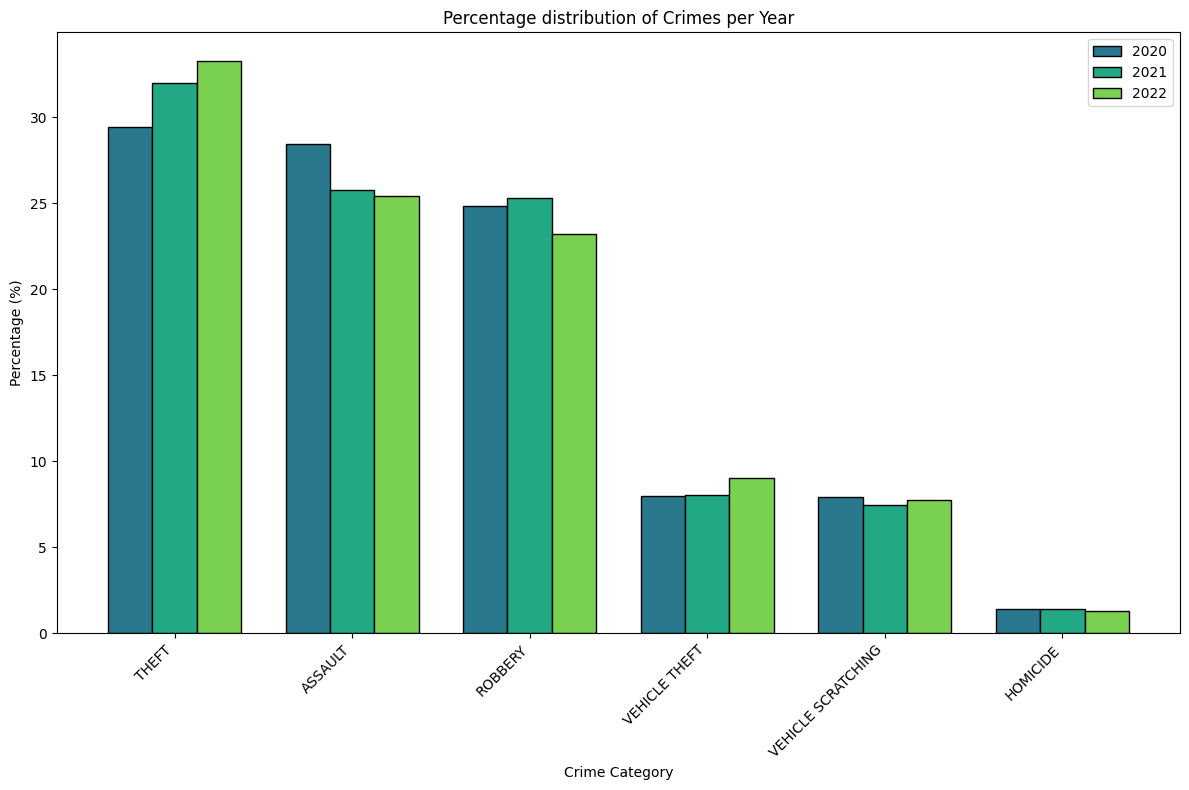

In [161]:
crime_percentage_2020 = (crcri_2020["crime"].value_counts() / len(crcri_2020)) * 100
crime_percentage_2021 = (crcri_2021["crime"].value_counts() / len(crcri_2021)) * 100
crime_percentage_2022 = (crcri_2022["crime"].value_counts() / len(crcri_2022)) * 100

plt.figure(figsize=(12, 8))
width = 0.25  # Width of each column

x_2020 = range(len(crime_percentage_2020))
plt.bar(x_2020, crime_percentage_2020, width=width, color=plt.cm.viridis(0.4), edgecolor="black", label="2020")

x_2021 = [pos + width for pos in x_2020]
plt.bar(x_2021, crime_percentage_2021, width=width, color=plt.cm.viridis(0.6), edgecolor="black", label="2021")

x_2022 = [pos + 2 * width for pos in x_2020]
plt.bar(x_2022, crime_percentage_2022, width=width, color=plt.cm.viridis(0.8), edgecolor="black", label="2022")

plt.title("Percentage distribution of Crimes per Year")
plt.xlabel("Crime Category")
plt.ylabel("Percentage (%)")
plt.xticks([pos + width for pos in x_2020], crime_percentage_2020.index, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

plt.show()

Understanding the regional disparities in homicide rates is crucial for effective crime prevention and resource allocation. By directing resources towards San Jose and Limon and implementing tailored strategies that address the unique challenges faced in these provinces, Costa Rica can work towards reducing homicide rates and promoting public safety across the nation.

##Gender crime distribution

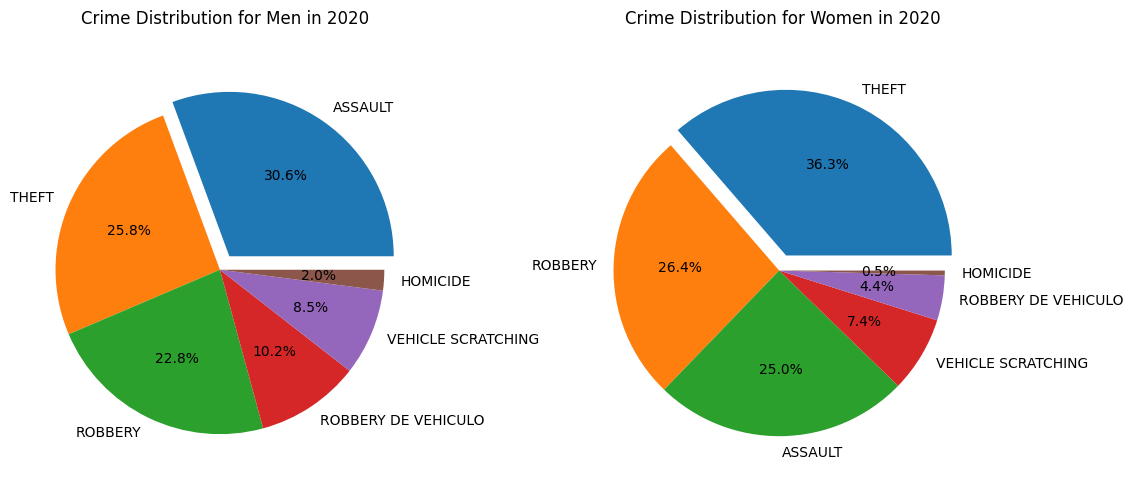

In [ ]:
filtered_df_hombre = crcri_2020[crcri_2020['gender'] == 'Male']
filtered_df_mujer = crcri_2020[crcri_2020['gender'] == 'Female']

crime_counts_hombre = filtered_df_hombre['crime'].value_counts()
crime_counts_mujer = filtered_df_mujer['crime'].value_counts()

most_common_crime_hombre = crime_counts_hombre.idxmax()
most_common_crime_mujer = crime_counts_mujer.idxmax()

explode_hombre = [0.1 if crime == most_common_crime_hombre else 0 for crime in crime_counts_hombre.index]
explode_mujer = [0.1 if crime == most_common_crime_mujer else 0 for crime in crime_counts_mujer.index]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(crime_counts_hombre, labels=crime_counts_hombre.index, autopct='%1.1f%%', explode=explode_hombre)
axes[0].set_title('Crime Distribution for Men in 2020')
axes[0].axis('equal')

axes[1].pie(crime_counts_mujer, labels=crime_counts_mujer.index, autopct='%1.1f%%', explode=explode_mujer)
axes[1].set_title('Crime Distribution for Women in 2020')
axes[1].axis('equal')
plt.subplots_adjust(wspace=0.5)
plt.show()

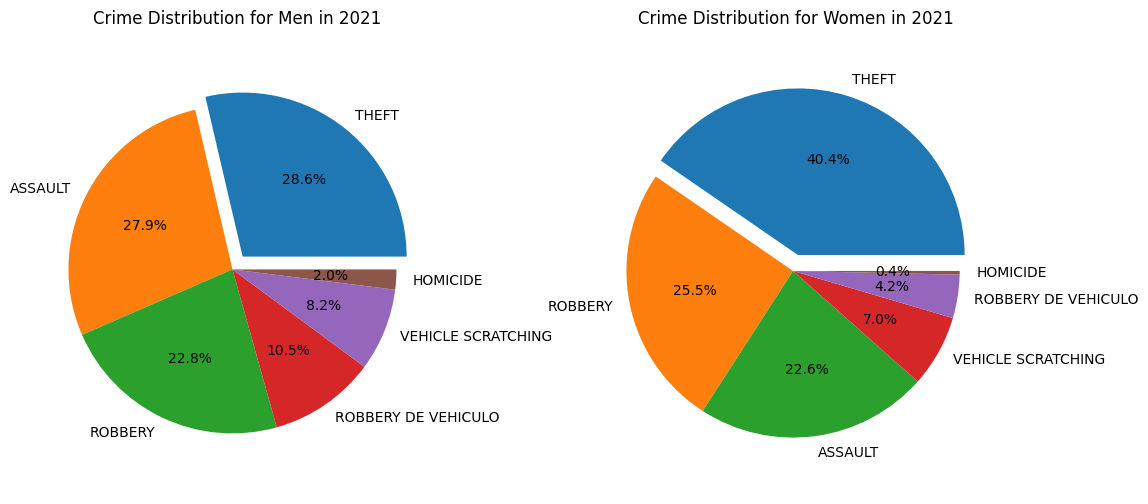

In [ ]:
filtered_df_hombre = crcri_2021[crcri_2021['gender'] == 'Male']
filtered_df_mujer = crcri_2021[crcri_2021['gender'] == 'Female']

crime_counts_hombre = filtered_df_hombre['crime'].value_counts()
crime_counts_mujer = filtered_df_mujer['crime'].value_counts()

most_common_crime_hombre = crime_counts_hombre.idxmax()
most_common_crime_mujer = crime_counts_mujer.idxmax()

explode_hombre = [0.1 if crime == most_common_crime_hombre else 0 for crime in crime_counts_hombre.index]
explode_mujer = [0.1 if crime == most_common_crime_mujer else 0 for crime in crime_counts_mujer.index]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(crime_counts_hombre, labels=crime_counts_hombre.index, autopct='%1.1f%%', explode=explode_hombre)
axes[0].set_title('Crime Distribution for Men in 2021')
axes[0].axis('equal')

axes[1].pie(crime_counts_mujer, labels=crime_counts_mujer.index, autopct='%1.1f%%', explode=explode_mujer)
axes[1].set_title('Crime Distribution for Women in 2021')
axes[1].axis('equal')
plt.subplots_adjust(wspace=0.5)
plt.show()

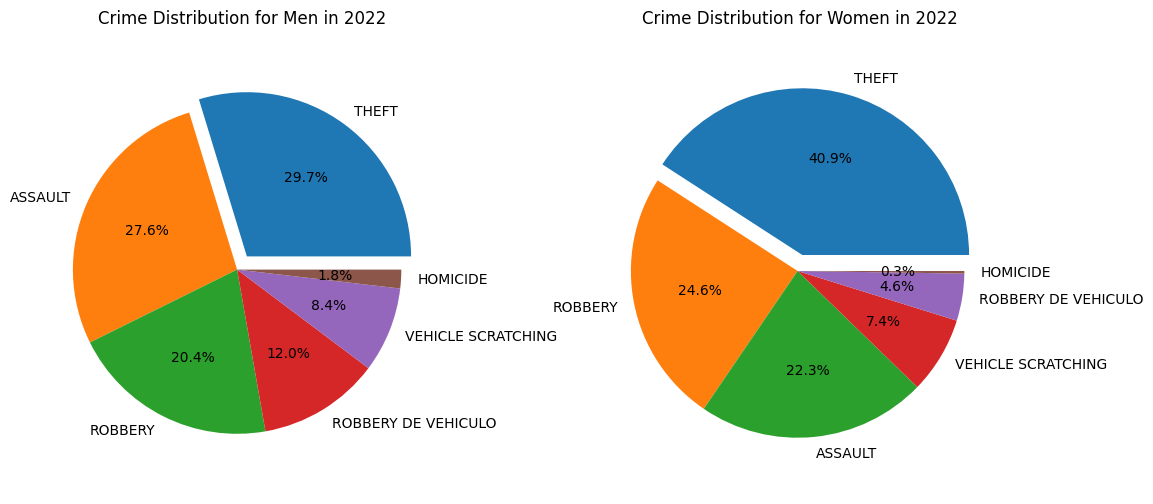

In [ ]:
filtered_df_hombre = crcri_2022[crcri_2022['gender'] == 'Male']
filtered_df_mujer = crcri_2022[crcri_2022['gender'] == 'Female']

crime_counts_hombre = filtered_df_hombre['crime'].value_counts()
crime_counts_mujer = filtered_df_mujer['crime'].value_counts()

most_common_crime_hombre = crime_counts_hombre.idxmax()
most_common_crime_mujer = crime_counts_mujer.idxmax()

explode_hombre = [0.1 if crime == most_common_crime_hombre else 0 for crime in crime_counts_hombre.index]
explode_mujer = [0.1 if crime == most_common_crime_mujer else 0 for crime in crime_counts_mujer.index]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(crime_counts_hombre, labels=crime_counts_hombre.index, autopct='%1.1f%%', explode=explode_hombre)
axes[0].set_title('Crime Distribution for Men in 2022')
axes[0].axis('equal')

axes[1].pie(crime_counts_mujer, labels=crime_counts_mujer.index, autopct='%1.1f%%', explode=explode_mujer)
axes[1].set_title('Crime Distribution for Women in 2022')
axes[1].axis('equal')
plt.subplots_adjust(wspace=0.5)
plt.show()

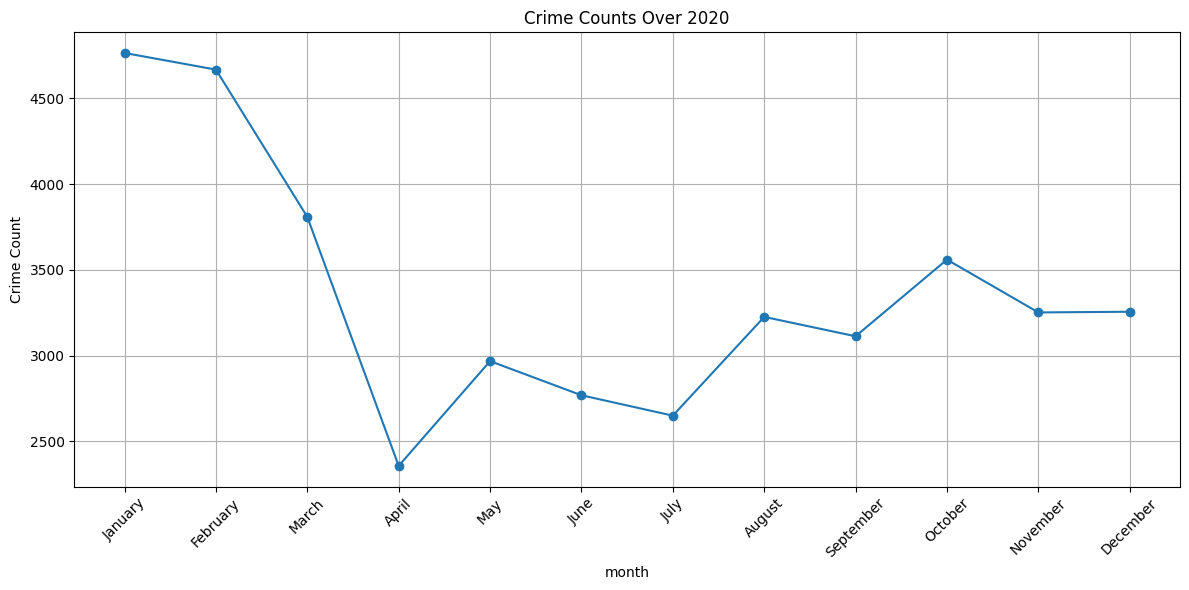

In [162]:
crime_count_by_month = crcri_2020.groupby('month')['crime'].count().reset_index()

month_order = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

crime_count_by_month['month_order'] = crime_count_by_month['month'].map(month_order)
crime_count_by_month = crime_count_by_month.sort_values('month_order')

plt.figure(figsize=(12, 6))
plt.plot(crime_count_by_month['month'], crime_count_by_month['crime'], marker='o', linestyle='-')
plt.xlabel('month')
plt.ylabel('Crime Count')
plt.title('Crime Counts Over 2020')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [163]:
crime_genre_group = crcri_2020.groupby(['crime', 'gender'])
gender_distribution = crime_genre_group['gender'].value_counts()

gender_distribution

crime               gender       gender     
ASSAULT             DESCONOCIDO  DESCONOCIDO     483
                    Female       Female         3376
                    Male         Male           7629
HOMICIDE            DESCONOCIDO  DESCONOCIDO       2
                    Female       Female           63
                    Male         Male            507
ROBBERY             DESCONOCIDO  DESCONOCIDO     773
                    Female       Female         3573
                    Male         Male           5684
THEFT               DESCONOCIDO  DESCONOCIDO     544
                    Female       Female         4914
                    Male         Male           6427
VEHICLE SCRATCHING  DESCONOCIDO  DESCONOCIDO      88
                    Female       Female          999
                    Male         Male           2119
VEHICLE THEFT       DESCONOCIDO  DESCONOCIDO      70
                    Female       Female          594
                    Male         Male           2548
N

In [164]:
crcri_2020['date'] = pd.to_datetime(crcri_2020['date'])

crcri_2020['month'] = crcri_2020['date'].dt.month_name()

filtered_df = crcri_2020[crcri_2020['gender'].isin(['Male', 'Female'])]

crime_counts_by_month = filtered_df.groupby(['month', 'gender'])['id'].count()

crime_counts_by_month

month      gender
April      Female     721
           Male      1532
August     Female    1043
           Male      2030
December   Female    1111
           Male      1983
February   Female    1660
           Male      2814
January    Female    1779
           Male      2793
July       Female     839
           Male      1680
June       Female     908
           Male      1715
March      Female    1280
           Male      2358
May        Female     937
           Male      1863
November   Female    1058
           Male      2005
October    Female    1168
           Male      2219
September  Female    1015
           Male      1922
Name: id, dtype: int64

This graph sheds light on an important aspect of criminality, revealing that men are more prone to being victims of criminal acts. The graph presents a comparative analysis of crime victimization between men and women, providing valuable insights into gender-specific vulnerabilities within the context of criminal incidents.

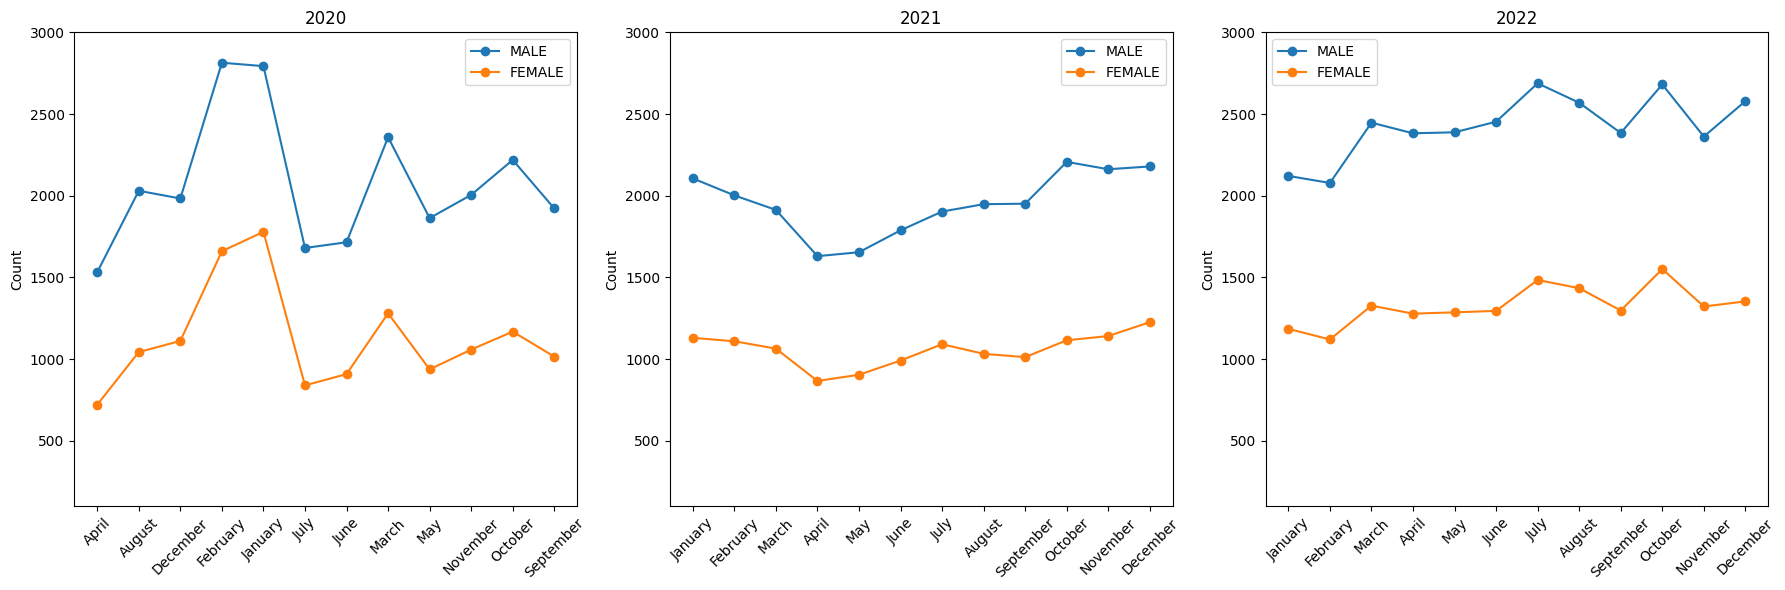

In [165]:
def plot_gender_distribution(ax, df, year):
    gender_distribution = df.groupby(['month', 'gender'])['gender'].count().unstack()

    ax.plot(gender_distribution.index, gender_distribution['Male'], marker='o', label='MALE')
    ax.plot(gender_distribution.index, gender_distribution['Female'], marker='o', label='FEMALE')

    ax.set_title(f'{year}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.legend()

    ax.set_xticks(range(len(gender_distribution.index)))
    ax.set_xticklabels(gender_distribution.index, rotation=45)

    ax.set_ylim(100, 3000)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))


plot_gender_distribution(ax1, crcri_2020, '2020')
plot_gender_distribution(ax2, crcri_2021, '2021')
plot_gender_distribution(ax3, crcri_2022, '2022')

plt.tight_layout()

plt.show()

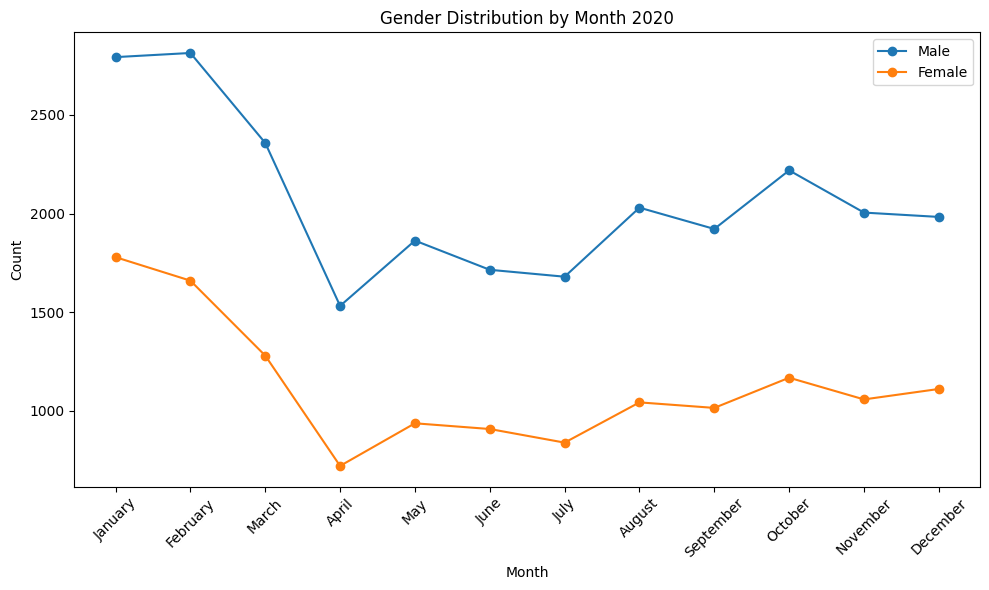

In [166]:
calendar_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

crcri_2020['month'] = pd.Categorical(crcri_2020['month'], categories=calendar_month_order, ordered=True)

crcri_2020.sort_values(by='month', inplace=True)

gender_distribution = crcri_2020.groupby(['month', 'gender'])['gender'].count().unstack()

plt.figure(figsize=(10, 6))

plt.plot(gender_distribution.index, gender_distribution['Male'], marker='o', label='Male')
plt.plot(gender_distribution.index, gender_distribution['Female'], marker='o', label='Female')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Gender Distribution by Month 2020')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

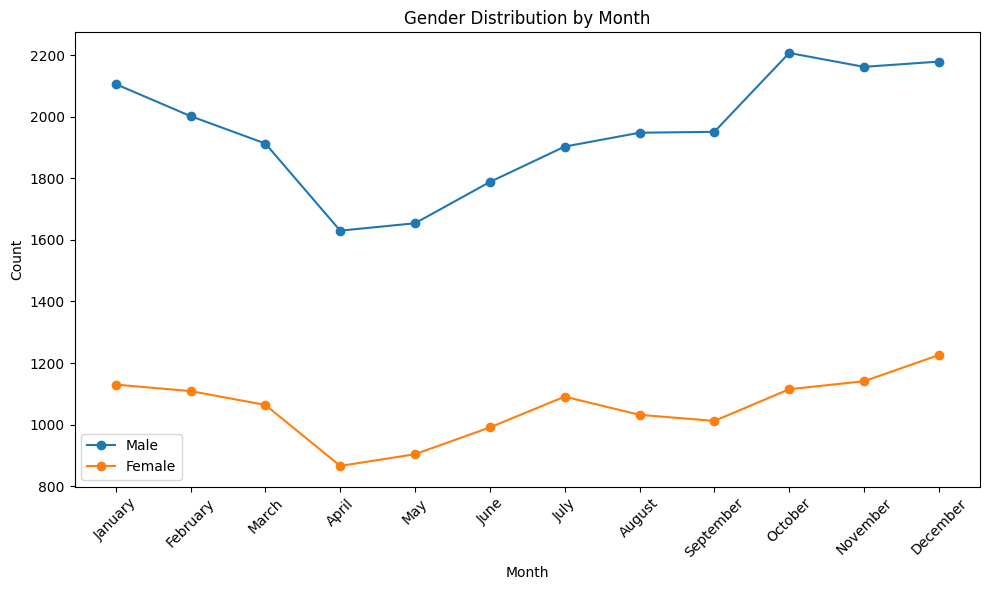

In [167]:
calendar_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

crcri_2021['month'] = pd.Categorical(crcri_2021['month'], categories=calendar_month_order, ordered=True)

crcri_2021.sort_values(by='month', inplace=True)

gender_distribution = crcri_2021.groupby(['month', 'gender'])['gender'].count().unstack()

plt.figure(figsize=(10, 6))

plt.plot(gender_distribution.index, gender_distribution['Male'], marker='o', label='Male')
plt.plot(gender_distribution.index, gender_distribution['Female'], marker='o', label='Female')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Gender Distribution by Month')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

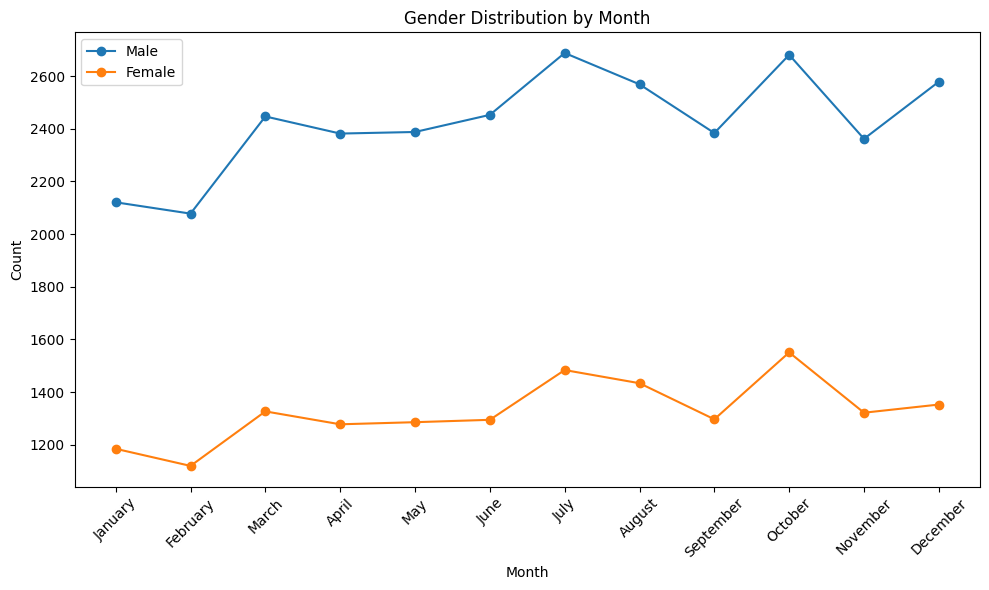

In [168]:
calendar_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

crcri_2022['month'] = pd.Categorical(crcri_2022['month'], categories=calendar_month_order, ordered=True)

crcri_2022.sort_values(by='month', inplace=True)

gender_distribution = crcri_2022.groupby(['month', 'gender'])['gender'].count().unstack()

plt.figure(figsize=(10, 6))

plt.plot(gender_distribution.index, gender_distribution['Male'], marker='o', label='Male')
plt.plot(gender_distribution.index, gender_distribution['Female'], marker='o', label='Female')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Gender Distribution by Month')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [169]:
gender_crime_counts = crcri_2020.groupby(['gender', 'crime',]).size().reset_index(name='count')

gender_crime_counts

,gender,crime,count
0,DESCONOCIDO,ASSAULT,483
1,DESCONOCIDO,HOMICIDE,2
2,DESCONOCIDO,ROBBERY,773
3,DESCONOCIDO,THEFT,544
4,DESCONOCIDO,VEHICLE SCRATCHING,88
5,DESCONOCIDO,VEHICLE THEFT,70
6,Female,ASSAULT,3376
7,Female,HOMICIDE,63
8,Female,ROBBERY,3573
9,Female,THEFT,4914


Assault, robbery, and theft emerge as the most common types of crimes suffered by both genders, impacting individuals across various demographic groups.

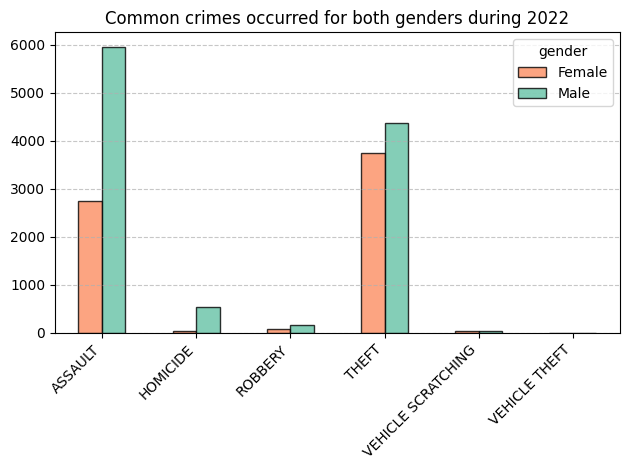

In [170]:
filtered_data_gender_2022 = crcri_2022[crcri_2022['gender'].isin(['Female', 'Male'])& (crcri_2022['victim'] == 'PERSONA')]
pivot_table = pd.pivot_table(filtered_data_gender_2022, index='crime', columns='gender', values='id', aggfunc='count', fill_value=0)

colors = sns.color_palette('Set2')

male_color = colors[1]
female_color = colors[0]
colors_swapped = [male_color, female_color]

ax = pivot_table.plot(kind='bar', edgecolor='black', alpha=0.8, color=colors_swapped)
plt.xlabel('')
plt.ylabel('')
plt.title('Common crimes occurred for both genders during 2022')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax.set_xticklabels(pivot_table.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
crcri_2020[50:100]

,id,crime,sub_crime,date_time,date,hour_range1,hour_range2,victim,sub_victim,victim_affected,age,gender,victim_nationality,city,canton,hour_range,month
4701,104702,ASSAULT,FIREARM,NaN,2020-01-02,12:00:00,14:59:59,EDIFICACION,OFICINAS/EMPRESA,EDIFICACION,Desconocido,DESCONOCIDO,Desconocido,SAN JOSE,SAN JOSE,12:00:00 - 14:59:59,January
21991,121992,VEHICLE SCRATCHING,VEHICLE TAMPERING,NaN,2020-01-04,18:00:00,20:59:59,VEHICULO,RURAL 4X4,VEHICULO,Mayor de edad,Male,ALEMANIA,GUANACASTE,NICOYA,18:00:00 - 20:59:59,January
21992,121993,VEHICLE SCRATCHING,VEHICLE TAMPERING,NaN,2020-01-04,18:00:00,20:59:59,OTROS,NO DEFINIDO,OTROS,Mayor de edad,Female,COSTA RICA,CARTAGO,EL GUARCO,18:00:00 - 20:59:59,January
21993,121994,VEHICLE SCRATCHING,VEHICLE TAMPERING,NaN,2020-01-07,15:00:00,17:59:59,VEHICULO,AUTOMOVIL,VEHICULO,Mayor de edad,Female,COSTA RICA,PUNTARENAS,PARRITA,15:00:00 - 17:59:59,January
21994,121995,VEHICLE SCRATCHING,VEHICLE TAMPERING,NaN,2020-01-09,6:00:00,8:59:59,VEHICULO,RURAL 4X4,VEHICULO,Mayor de edad,Female,ESTADOS UNIDOS,GUANACASTE,SANTA CRUZ,6:00:00 - 8:59:59,January
21995,121996,VEHICLE SCRATCHING,VEHICLE TAMPERING,NaN,2020-01-12,3:00:00,5:59:59,VEHICULO,RURAL 4X4,VEHICULO,Mayor de edad,Male,COSTA RICA,SAN JOSE,GOICOECHEA,3:00:00 - 5:59:59,January
21996,121997,VEHICLE SCRATCHING,VEHICLE TAMPERING,NaN,2020-01-10,18:00:00,20:59:59,VEHICULO,AUTOMOVIL,VEHICULO,Mayor de edad,Male,COSTA RICA,CARTAGO,PARAISO,18:00:00 - 20:59:59,January
21997,121998,VEHICLE SCRATCHING,VEHICLE TAMPERING,NaN,2020-01-13,15:00:00,17:59:59,VEHICULO,RURAL 4X4,VEHICULO,Mayor de edad,Female,COSTA RICA,SAN JOSE,MONTES DE OCA,15:00:00 - 17:59:59,January
4693,104694,ASSAULT,BLUNT WEAPON,NaN,2020-01-23,21:00:00,23:59:59,VEHICULO,SERVICIO PUBLICO/TAXI LEGAL O PIRATA/AUTOBUS,VEHICULO,Mayor de edad,Female,COSTA RICA,SAN JOSE,SAN JOSE,21:00:00 - 23:59:59,January
4692,104693,ASSAULT,BLUNT WEAPON,NaN,2020-01-14,21:00:00,23:59:59,PERSONA,PEATON,PERSONA,Mayor de edad,Female,COSTA RICA,SAN JOSE,SAN JOSE,21:00:00 - 23:59:59,January


In [171]:

assault_df = crcri_2020[(crcri_2020['crime'] == 'ASSAULT') & (crcri_2020['sub_crime'] != 'UNKNOWN')]

assault_count_by_gender_subcrime = assault_df.groupby(['gender', 'sub_crime']).size().reset_index(name='count')

assault_count_by_gender_subcrime_sorted = assault_count_by_gender_subcrime.sort_values(by='count', ascending=False)
assault_count_by_gender_subcrime_sorted

,gender,sub_crime,count
23,Male,FIREARM,4030
19,Male,BLADED WEAPON,1735
13,Female,FIREARM,1455
16,Female,SNATCHING,802
9,Female,BLADED WEAPON,618
20,Male,BLOWS,526
26,Male,SNATCHING,485
4,DESCONOCIDO,FIREARM,349
28,Male,VERBAL INTIMIDATION,281
22,Male,CHINESE LOCK,233


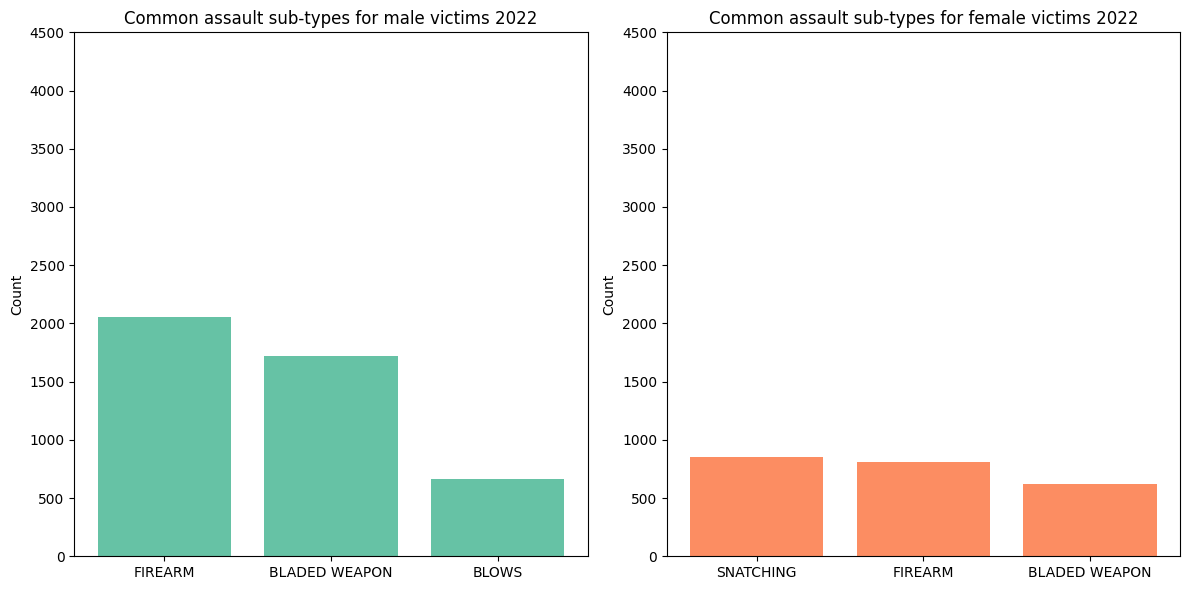

In [172]:
#GENERATED WITH CHATGPT3
assault_df = crcri_2022[(crcri_2022['crime'] == 'ASSAULT') & (crcri_2022['sub_crime'] != 'UNKNOWN')& (crcri_2022['victim'] == 'PERSONA')]
assault_df = crcri_2022[(crcri_2022['crime'] == 'ASSAULT') & (crcri_2022['victim_affected'] == 'PERSONA')]

male_assault_df = assault_df[assault_df['gender'] == 'Male']
female_assault_df = assault_df[assault_df['gender'] == 'Female']

top_male_subcrime = male_assault_df['sub_crime'].value_counts().nlargest(3)
top_female_crime = female_assault_df['sub_crime'].value_counts().nlargest(3)

plt.figure(figsize=(12, 6))

male_color = colors[0]
female_color = colors[1]


plt.subplot(1, 2, 1)
plt.bar(top_male_subcrime.index, top_male_subcrime.values, color=male_color)
plt.title("Common assault sub-types for male victims 2022")
plt.xlabel("")
plt.ylabel("Count")
plt.ylim(0, 4500)

plt.subplot(1, 2, 2)
plt.bar(top_female_crime.index, top_female_crime.values, color=female_color)
plt.title("Common assault sub-types for female victims 2022")
plt.xlabel("")
plt.ylabel("Count")
plt.ylim(0, 4500)

plt.tight_layout()

# Show the plots
plt.show()

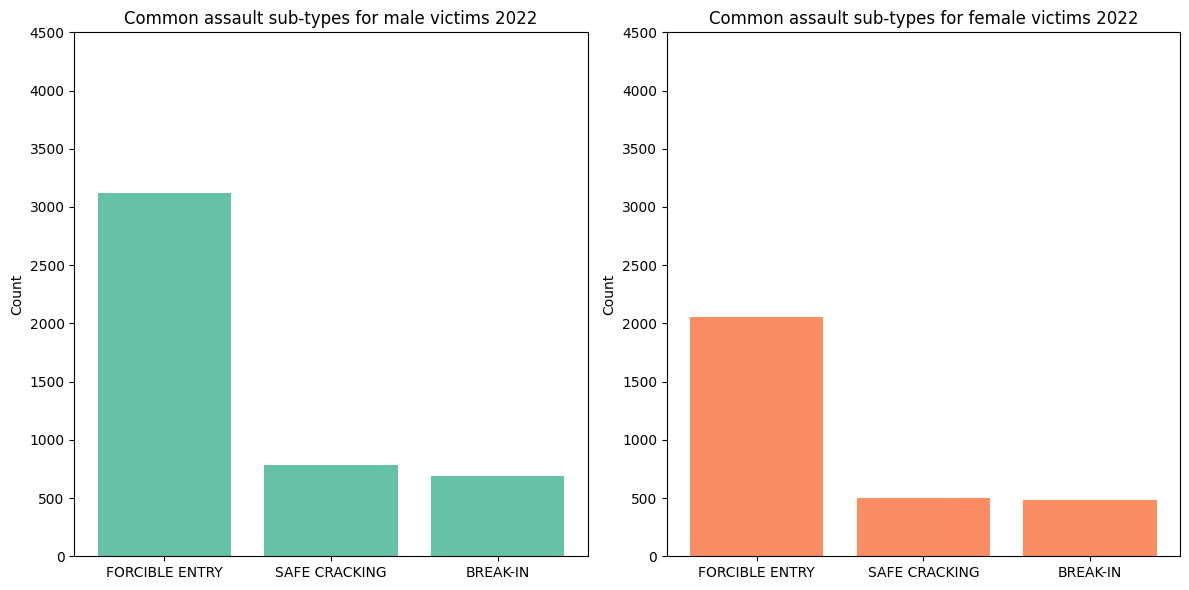

In [173]:
robbery_df = crcri_2022[(crcri_2022['crime'] == 'ROBBERY') & (crcri_2022['sub_crime'] != 'UNKNOWN')]
robbery_df = crcri_2022[(crcri_2022['crime'] == 'ROBBERY')]


male_robbery_df = robbery_df[robbery_df['gender'] == 'Male']
female_robbery_df = robbery_df[robbery_df['gender'] == 'Female']

top_male_subcrime = male_robbery_df['sub_crime'].value_counts().nlargest(3)
top_female_crime = female_robbery_df['sub_crime'].value_counts().nlargest(3)

plt.figure(figsize=(12, 6))

male_color = colors[0]
female_color = colors[1]


plt.subplot(1, 2, 1)
plt.bar(top_male_subcrime.index, top_male_subcrime.values, color=male_color)
plt.title("Common assault sub-types for male victims 2022")
plt.xlabel("")
plt.ylabel("Count")
plt.ylim(0, 4500)

plt.subplot(1, 2, 2)
plt.bar(top_female_crime.index, top_female_crime.values, color=female_color)
plt.title("Common assault sub-types for female victims 2022")
plt.xlabel("")
plt.ylabel("Count")
plt.ylim(0, 4500)

plt.tight_layout()

plt.show()

Foreigners and tourists visiting new destinations often seek enriching experiences, cultural exploration, and memorable adventures. However, alongside the excitement of travel, there is also a need to be mindful of potential risks and safety considerations. Like any other location, tourists and foreigners may face specific challenges related to criminality in their host countries.

This introduction delves into the impact of criminality on foreigners or tourists, highlighting some of the key concerns they may encounter during their travels. Understanding these challenges is crucial for promoting safer and more enjoyable experiences for those exploring unfamiliar territories.

In [174]:
victim_nationality_count = crcri_2022.groupby('victim_nationality')['crime'].count().reset_index()
filtered_df = crcri_2022[~crcri_2022['victim_nationality'].isin(['COSTA RICA', 'NICARAGUA','Desconocido'])]

victim_nationality_count = filtered_df.groupby('victim_nationality')['crime'].count().reset_index()
victim_nationality_count.columns = ['victim_nationality', 'crime_count']

top_4_nationalities = sorted_table.head(4)

print(top_4_nationalities)

   victim_nationality  crime_count
29     ESTADOS UNIDOS         1018
1             Germany          291
12             CANADA          286
33            FRANCIA          258


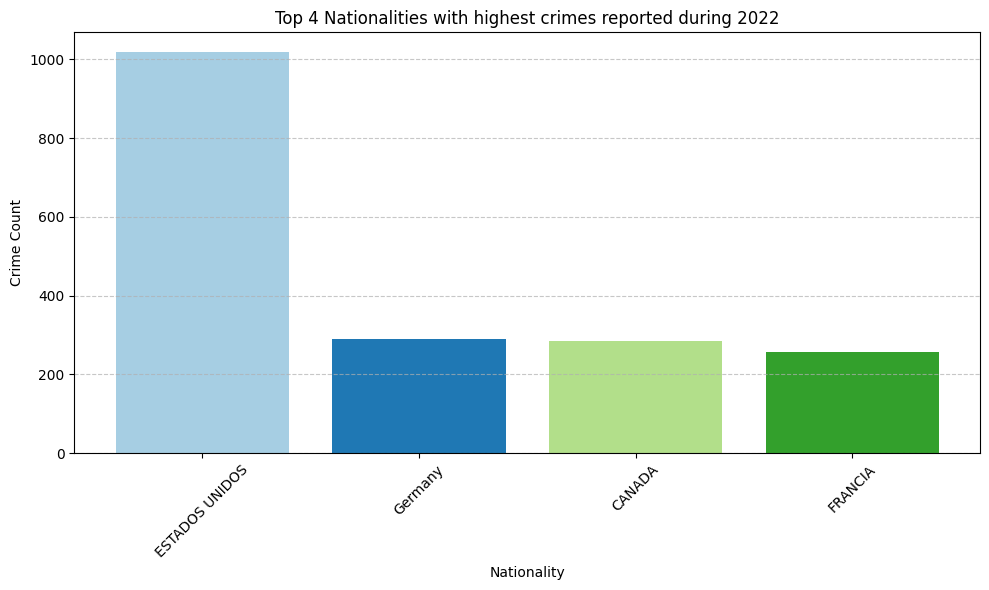

In [175]:
filtered_df = crcri_2022[~crcri_2022['victim_nationality'].isin(['COSTA RICA', 'NICARAGUA','Desconocido'])]

victim_nationality_count = filtered_df.groupby('victim_nationality')['crime'].count().reset_index()
victim_nationality_count.columns = ['victim_nationality', 'crime_count']
victim_nationality_count['victim_nationality'] = victim_nationality_count['victim_nationality'].replace('ALEMANIA', 'Germany')


sorted_table = victim_nationality_count.sort_values(by='crime_count', ascending=False)

#top 4 nationalities with highest crime counts
top_4_nationalities = sorted_table.head(4)

colors = plt.cm.Paired(range(len(top_4_nationalities)))

plt.figure(figsize=(10, 6))
plt.bar(top_4_nationalities['victim_nationality'], top_4_nationalities['crime_count'], color=colors)
plt.xlabel('Nationality')
plt.ylabel('Crime Count')
plt.title('Top 4 Nationalities with highest crimes reported during 2022')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Tourists from the United States are the most affected by criminality while visiting Costa Rica. The graph illustrates the number of reported criminal incidents involving tourists from various countries, and the data highlights a significantly higher occurrence of criminal incidents concerning United States tourists compared to other nationalities.

In [176]:
filtered_df_us_subcrime = crcri_2022[crcri_2022['crime'].isin(['ASSAULT', 'THEFT'])]
filtered_df_us_subcrime = crcri_2022[crcri_2022['victim_nationality'] == 'ESTADOS UNIDOS']

sub_crime_count_us = filtered_df_us_subcrime.groupby('sub_crime').size().reset_index(name='count')

sub_crime_count_us

,sub_crime,count
0,ASSAULT,3
1,BLADED WEAPON,15
2,BLOWS,10
3,BREAK-IN,25
4,CAR RAMMING,6
5,CARELESSNESS,225
6,CHINESE LOCK,1
7,CUTTING PADLOCKS,8
8,FIREARM,34
9,FOR THE COMMISSION OF ANOTHER CRIME,1


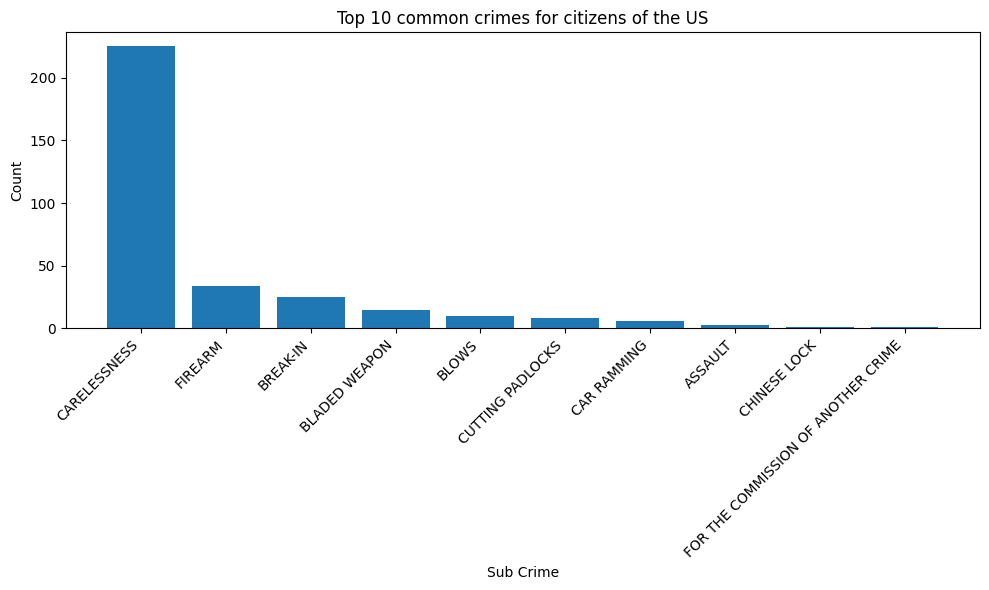

In [177]:
top_10_sub_crimes = sub_crime_count_us.head(10)
top_10_sub_crimes = top_10_sub_crimes.sort_values(by='count', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(top_10_sub_crimes['sub_crime'], top_10_sub_crimes['count'])
plt.xlabel('Sub Crime')
plt.ylabel('Count')
plt.title('Top 10 common crimes for citizens of the US')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

It is evident that carelessness is the main crime committed to U.S. citizens visiting Costa Rica. The graph illustrates the types of crimes reported by U.S. tourists during their visits, and the data clearly indicates that carelessness stands out as the primary offense.

Carelessness may involve situations such as leaving valuables unattended, failing to secure belongings properly, or not being vigilant in public spaces. These actions can make U.S. tourists more susceptible to theft, scams, and other opportunistic criminal activities.

##Conclusion

The data analysis project reveals several crucial trends and insights about crime and criminality in Costa Rica over a three-year period.

Rising Crime Rate: The crime rate per 100,000 people has consistently increased from 790.28 in 2020 to 967.42 in 2022. This trend highlights the importance of addressing crime prevention strategies and understanding the the different factors contributing to this rise.
Homicide Rates: Over the same three-year period, the analysis indicates a concurrent increase in homicide rates.
Regional Disparities in Homicides: San Jose and Limon provinces are  experiencing the highest gross of homicides, while Guanacaste and Cartago report the least. Taking these regional variations may help in redirecting resources and targeted efforts to address crime in different areas effectively.
Early Morning Hours Vulnerability: The time range from 0:00:00 to 2:59:59, representing the early morning hours, witnesses heightened criminal activity. This underscores the need for heightened security measures and crime prevention initiatives during this period.
Prevalence of Assault, Robbery, and Theft: Assault, robbery, and theft are the most common types of crimes experienced by the population. The findings underscore the importance of tailored interventions to combat these offenses and protect the well-being of the population.
Impact on the tourism: Tourists from the United States are particularly affected by criminality while visiting Costa Rica. This emphasizes the need for enhanced safety measures and targeted support for U.S. travelers to ensure a positive and secure travel experience.
Overall, the data analysis project provides essential insights that can guide policymakers, law enforcement agencies, and relevant stakeholders in formulating evidence-based strategies to combat crime effectively. By addressing regional disparities, focusing on early morning hours, and targeting specific crime types, Costa Rica can work towards creating a safer and more secure environment for its citizens and visitors alike. Collaboration and proactive measures are key to fostering a positive impact and ensuring the well-being of the community as a whole.